# paper

# [Generative Adversarial Nets](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf)

**Ian J. Goodfellow∗
, Jean Pouget-Abadie†
, Mehdi Mirza, Bing Xu, David Warde-Farley,
Sherjil Ozair‡
, Aaron Courville, Yoshua Bengio§**

Departement d’informatique et de recherche op ´ erationnelle ´
Universite de Montr ´ eal ´
Montreal, QC H3C 3J7 



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.0.0


# 목차

---

### - 1. GAN 기본 개념
### - 2. Objective function 
### - 3. 학습과정
### - 4. Theoretical result

---

# 1 GAN 기본 개념

### 1.1 GAN은 생성모델을 만드는 프레임워크이다.

- 생성모델(G)과 분류모델(D)의 적대적 관계(adversarial process)를 이용한다.

- 생성모델(G)는 데이터 분포(data distribution)을 생성한다.

- 분류모델(D)는 샘플이 G로부터 왔는지, 데이터로부터 왔는지 분류한다. 

- G는 D의 실수를 maximize 하는 방향으로 학습하고, D는 실수를 minimize하도록 학습한다. (minmax game)

### 1.2 Counterfeiters and Police

논문에서 G는 위조범(Counterfeiters), D는 경찰(Police)로 비유하여 설명한다.

위조범은 경찰에게 걸리지 않고, 가짜를 만들기 위해 노력할 것이고, 경찰은 그 가짜를 구별하기 위해 노력할 것이다. 이 경쟁을 통해 둘다 그 일을 잘하게 될것이고, 위조범이 구별할 수 없는 가짜를 만들어 낼 때까지 계속될 것이다.


### 1.3 GAN의 구조

GAN 프레임워크는 다음과 같이 표현할 수 있다.

![GAN 구조](img/03.png)

먼저 z가 Generator를 통과(forward propagation)하며 sample을 만들어 낸다. 이때 논문에서는 z값을 random하게 만들어 사용하였다. 또한 sample의 크기는 학습 데이터(x)의 크기와 동일하다.

만들어진 sample과 데이터(x) Discriminator를 통과하여 분류된다.

Generator와 Discriminator는 둘다 multilayer perceptron 모델이다. 따라서 backkpropagation과 dropout 알고리즘으로 학습 될 수 있다.


# 2 Objective function
---
### 2.0 용어 정리
- $x$ : 데이터
- $z$ : Input noise
- $p$ : 분포(distribution)
    - $p_g(x) $ : x에 대한 g의 분포
    - $p_{data}(x) $ x의 분포
    - $p_z(z) $ 노이즈에 대한 분포


- $G$ : Generator,  $G(z;\theta_g)$ 
    - $ \theta_g $ : G의 파라미터
    
    
- $D$ : Discriminator, $D(x;\theta_d)$
     - $ \theta_d $ : D의 파라미터
---



### 2.1 Value function
$G(z;\theta_g)$의 결과는 공간 데이터가 나올 것이고, $D(x;\theta_d)$는 하나의 스칼라 값이 나올 것이다.

$D$는 판별을 잘하는 방향으로 학습해야 되므로, correct label(True, False)의 확률을 maximize 하는 방향이 될 것이고, $G$는 minimize 하는 방향으로 학습 될 것이다.

$D,G$ 에 대한 가치함수(value function) $V(G,D)$는 다음과 같다.


![value_function](img/01.png)

---

### 2.2 Value function 에 대한 유도

위의 value function을 보면 cross entropy 수식과 유사한 형태를 보인다. 따라서 위 value function을 보다 이해해 보고자, 기본적인 cross entropy로 부터 유도해 보았다.

- `Binary Cross entropy`는 다음과 같이 정리된다.<br>
$$ y log(\hat{y}) + (1-y)log(1-\hat{y})$$
    - $y$ : real label , 0 or 1
    - $\hat{y}$ : predict 값, [0,1]


위 식을 Discriminator에 적용하면, x가 들어간 경우와, G(z)가 들어간 경우 두가지로 나누어 볼 수 있다.

- **1) input : x 인 경우**

    - input 이 x 일때, $y=1$ 이고, $\hat{y} = D(x)$ 이다. 이 경우의 Cross entropy는 다음과 같다.
$$ log(D(x)) $$
    

- **2) input : G(z)인 경우**

    - input 이 G(z) 일때, $y=0$ 이고, $\hat{y} = D(G(z))$ 이므로 Cross entropy는 다음과 같다.
$$ log(1 - D( G(z) ) ) $$


1)과 2)를 합치면 위의 Value function의 오른쪽 수식이 나오게 된다.

---

### 2.3 Value function 으로 본 해석

**D의 입장**에서 생각해 볼 때, 잘 동작하는 D의 value function은 0 이 된다.
(D(x)=1, D(G(z)) = 0 이므로) 

반대로 잘 동작하지 못하는 D의 경우 value function은 -$\infty$ (D(x)=0, D(G(z))=1 )가 된다.

따라서 **D의 입장에서는 Value function을 maximize 하는 방향**으로 학습하여야 한다.

위와 마찬가지로 G의 입장에서 생각해볼 때, D를 잘 속이는 G는 D(G(z)) = 1 이 되어야 하므로 value funtion을 작게 만든다. 그러므로 **G는 value function을 minimize 하는 방향**이 되어야 한다.

따라서 $\min\limits_G \max\limits_D V(D,G) $ 로 표현 할 수 있다.

---

# 3 학습과정
### 3.1 학습 과정

논문에 있는, 학습과정을 잘 보여주는 이미지.

![Figure 1](img/02.png)
<center>논문의에 있는 figure 1 사진</center>

- (a) : 처음 시작할 때. $p_g$ 가 $p_{data}$와 전혀 다르게 생긴 것을 확인 할 수 있다.
- (b) : (a) 상태에서 $D$가 학습 하였을 때. $p_d$가 좀 더 smooth 하고 잘 구별하는 distribution이 만들어 진다.
- (c) : (b)에서 $G$가 학습 ($D$가 잘 구별하지 못하는 방향으로) 한 상태. $p_g$ 와 $p_{data}$ 가 좀더 가까워 진다.
- (d) : 위 과정을 반복한다면 최종적으로 $p_g$ = $p_{data}$ 가 되어 $D$가 둘을 전혀 구별하지 못하는 상태. 즉 $D(x) = \frac{1}{2}$ 이 된다.

학습을 할 때, $D$는 k-step 많큼 학습을 하고, $G$는 1-step 많큼 학습을 한다. 이는 inner loop에서 $D$가 완전히 학습되지 않고 optimal solution 근처에 있게 하고, 그로인해 $G$가 천천히 학습될 수 있게 하는 효과를 가진다.(논문에서는 k=1 을 사용했다고 한다.) 

또한 논문에서, 실전에서 G의 목적함수 $log(1-D(G(z))$를 minimize 하는 대신 $log(D(G(z))$를 maximize 하게 한다. 학습 초기에 기반 데이터가 다르므로 G는 빠르게 학습되지 못하고, D는 잘 학습되는 경향이 있다. 그로인해 G의 학습이 잘 되지 못하는데, $log(D(G(z))$를 사용하면 학습 초기에 더 강한 gradients를 발생 시킬 수 있어 위의 문제를 어느정도 방지 할 수 있다.


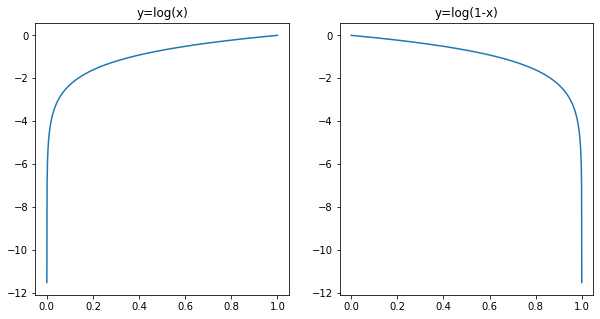

In [2]:
delta = 1e-5
x = np.linspace(0+delta,1-delta,1000)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(x,np.log(x))
ax1.title.set_text('y=log(x)')

ax2 = fig.add_subplot(122)
ax2.plot(x,np.log(1-x))
ax2.title.set_text('y=log(1-x)')

plt.show()


---
위의 내용으로 학습과정을 정리하면 다음과 같이 정리 할 수 있다.
![gan_minibatch](img/04.png)
---

# 4. Theoretical Results

### 4.1 Global Optimality of $p_g = p_{data}$

Global Optimal 이 $p_g = p_{data}$ 임을 증명은 아래의 과정을 거친다.

1) G가 fixed 되어 있을 때, optimal D의 값을 찾는다.
$$D^*_G(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)} $$


2) 1에서 구한 D의 값으로, $V(G,D)$의 $\min\limits_G$값이 $p_g = p_{data}$ 일 때를 확인한다.
- 논문에서는 $p_g = p_{data}$ 를 가질 때, $V(G,D)=-log(4)$를 가지고, 이 값이 $min$값임을 보여 증명한다. 

---
    
![pg=pdata](img/06.png)

---



### 4.1.1) Proposition 1.

**a)** Value function을 전개 하면 다음과 같다.

$
\begin{align}
 \ V(G,D) &= \int_x p_{data}(x) logD(x)dx + \int_z p_z(z) log(1-D(g(z)))dz
\\        &= \int_x \Bigl( p_{data}(x) logD(x) + p_g(x)log(1-D(x)) \Bigl) dx
\end{align}
$
 
**b)** 여기서 두번째 식은 $alog(y)+blog(1-y)$ 형태이다. 

$f(y) = alog(y) + b log(1-y)$에서 $a,b$가 0이 아닌 실수($(a,b) \in \mathbb R^2 \backslash \{0,0\}$ )이고, [0,1] 구간일 때, $ y=\frac{a}{a+b} $에서 최대값을 가진다.
    
이는 간단한 미분 계산이다. $alog(y) + b log(1-y)$는 convex(위로 볼록)한 형태를 가지므로, 미분값이 0인 곳이 max point 이다.
    
$
\begin{align}
 \ f(y)\prime &= \frac{1}{10} \bigl( \frac{a}{y} - \frac{b}{1-y} \bigl) = 0
 \\           &= \frac{a-(a+b)y}{y(1-y)} = 0
 \\ \therefore y = \frac{a}{a+b}
\end{align}
$
    
**c)** b의 식을 a에 적용하면 
$$
\begin{align}
 \ D^*_G(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}
\end{align}
$$

$Supp(p_{data}) \bigcup Supp(p_g)$ 이외의 범위는 논의 할 필요가 없다...

### 4.1.2) Theorem 1.
위에서 $D$가 maxmize 되었을 때의 값을 찾았으므로, 이번에는 $D$가 maximize 되었다($D^*$)고 생각하고 $\min\limits_G V(G,D^*)$일 때를 생각한다.

**a)** $C(G) = \max\limits_D V(G,D) = V(G,D^*)$ 라고 할 때, $C(G)$를 다시 전개하면

$\begin{align}
 \ C(G) &= \mathbb E_{x \sim p_{data}} [logD^*_G(x)] + \mathbb E_{z \sim p_z}[log(1-D^*_G(G(z)))]
\\      &= \mathbb E_{x \sim p_{data}} [logD^*_G(x) ] + \mathbb E_{x \sim p_g}[log(1-D^*_G(x))]
\\      &= \mathbb E_{x \sim p_{data}} [log \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}]
           + \mathbb E_{x \sim p_{g}}[log \frac{p_g(x)}{p_{data}(x)+p_g(x)}]
\end{align}$
<br><br>

**b)** $p_g = p_{data}$ 일 때, C(G)의 값은 $-log(4)$ 를 가진다.

이를 이용하여 역으로 C(G)의 최소값이 $-log(4)$임을 보이면, $p_g = p_{data}$일 때가 최소점임을 알 수 있다.

$\begin{align}
 \ C(G)&=-log(4)+log(4)+C(G)
\\     &= -log(4) + log(4)+ \mathbb E_{x \sim p_{data}} [log \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}]
           + \mathbb E_{x \sim p_{g}}[log \frac{p_g(x)}{p_{data}(x)+p_g(x)}]
\\     &= -log(4) + \mathbb E_{x \sim p_{data}} [log \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}] + log(2)
           + \mathbb E_{x \sim p_{g}}[log \frac{p_g(x)}{p_{data}(x)+p_g(x)}] +log(2)
\\     &= -log(4) + \mathbb E_{x \sim p_{data}} [log \frac{2p_{data}(x)}{p_{data}(x) + p_g(x)}]
           + \mathbb E_{x \sim p_{g}}[log \frac{2p_g(x)}{p_{data}(x)+p_g(x)}]
\\
\\     &= -log(4) + KL \Bigl( p_{data}|| \frac{p_{data} + p_g}{22} \Bigl) 
                 + KL \Bigl( p_{g}|| \frac{p_{data} + p_g}{22} \Bigl)
\\
\\     &= -log(4) + 2 JSD(p_{data} || p_q)
\end{align}$

---

여기서 KL(Kullback_leibler divergence)에 대해 알아보면. 
[Wiki -ko](https://ko.wikipedia.org/wiki/%EC%BF%A8%EB%B0%B1-%EB%9D%BC%EC%9D%B4%EB%B8%94%EB%9F%AC_%EB%B0%9C%EC%82%B0),
[Wiki-en](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)

- KL은 두 확률분포의 차이를 계산하는 데 사용하는 함수이다. 상대 엔트로피 등으로 불린다.

- $D_{KL}(P||Q) = H(P,Q) - H(P)$로 부터 유도할 수 있다. 여기서 $H$는 cross entropy를 뜻한다.

- 연속확률변수일 경우 $D_{KL}(P||Q) = \int_x p(x)log\frac{p(x)}{q(x)}dx$ 로 정의 된다. (p,q는 확률 밀도 함수)

- 비대칭으로, 두 값의 위치를 바꾸면 함수값도 달라진다. 따라서 이 함수는 거리 함수가 아니다.

- 항상 0 이상의 값을 가진다. (non-negative) 

마찬가지로 JSD(Jensen-Shannon Divergence)에 대해 잠깐 알아보면

- KL의 Unsymmetric 한 성질을 때문에 사용

- $JSD(P||Q) = \frac{1}{2} D_{KL} ( p|| \frac{p+q}{2} ) + \frac{1}{2} D_{KL} (q || \frac{p+q}{2})$ 로 정의 된다.

- $ 0 \leq JSD(P||Q) \leq 1$ 값을 가진다.

---

**c)** $C(G)$는 -log(4) 이상의 값을 가지므로, $p_g = p_{data}$ 일 때, global minimum 값을 가진다.

따라서 Generative model은 완벽하게 data distribution을 구현해 낼 수 있다.

---

## 4.2 Convergence of Algorithm 1

- G와 D가 학습할 것이 남은 상황에서, Algorithm1의 step을 따를때, 학습된 G와 p_g가 D를 optimium 값으로 유도 할 수 있다. 라는 것에 대한 증명.

- 교차학습하는 것이 optimum으로 이끌 수 있는가의 증명?

---

![Convergence of algorithm](img/07.png)

---

step에서 충분히 학습된 $p_g$에 대한 $V(G,D)$를 $U(p_g,D)$라고 할 때, $U(p_g,D)$ 역시 convex하다. 

`The subderivatives of a supremum of convex functions include the derivative of the function at the point where the maximum is attained`

볼록함수에서, supremum에 있는 subderivatives는 maximum에 도달한 derivative를 포함한다. 그러므로 몇번의 업데이트를 통해서 $p_g = p_{data}$로 수렴 할 수 있다.


---

실제로는, $p_g$ 대신 $\theta_g$를 학습 시키는 것이므로, 이론과 정확히 일치 하지 않는 허점이 있다. 하지만 실제 실험에서 좋은 성능을 내는것으로 보아, 이론적인 허점이 있음에도 불구하고 충분히 함리적인 모델이라고 말하고 있다.


---

# Code

###### 안된다 너무 슬프다.

## 1. Data

### MNIST data set

In [3]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


(60000, 28, 28)
(6131, 28, 28)


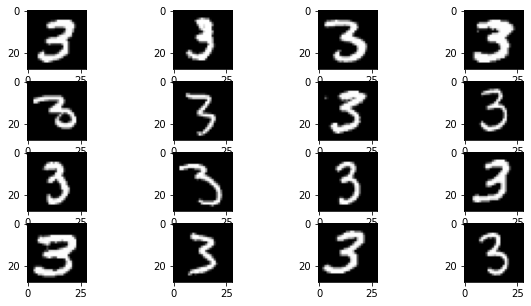

In [4]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
print(train_images.shape)

learn_label = 3
train_images = train_images[train_labels==learn_label]
print(train_images.shape)

fig = plt.figure(figsize=(10,5))
for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(train_images[i],cmap='gray')
plt.show()

In [5]:
train_images = (train_images-127.5)/127.5

### create noise

In [6]:
def create_noise(batch_size, noise_dim):
    return np.random.uniform(low=-1, high=1, size=(batch_size, noise_dim))
#     return np.random.normal(size=(batch_size, noise_dim))

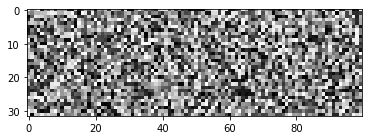

In [7]:
noise = create_noise(32,100)
plt.imshow(noise,cmap= 'gray')
plt.show()

## 2. Model

### Fully connected layer

In [8]:
def Xavier(size):
    return np.random.normal(size = size, scale = np.sqrt(2/(np.sum(size))))

class DNN:
    def __init__(self, size, **kwargs):
        
        self.size = size
        
        self.w = Xavier(size)
        self.b = np.zeros(size[-1])
        
        # for backward
        self.cache = None
        
        # for sgd_momentum
        self.w_config = {'v': np.zeros_like(self.w)}
        self.b_config = {'v': np.zeros_like(self.b)}
        for config in [self.w_config, self.b_config]:
            config['lr'] = kwargs.get('lr', 1e-3)
            config['m'] = kwargs.get('m', 0.9)
        
        
    def __str__(self):
        return "{size} size fully connect layer".format(size=self.size)
        
    def forward(self,x):
        out = x.reshape(x.shape[0], -1).dot(self.w) + self.b
        self.cache = x
        return out
        
    def backward(self, dout):
        x = self.cache
        w = self.w
        b = self.b
        
        dx = dout.dot(w.T).reshape(x.shape)
        dw = x.reshape(x.shape[0], -1).T.dot(dout)
        db = np.sum(dout, axis=0)
        
        return dx, dw, db    
        
    def momentum_update(self,dw,db):
        
        self.w_config['v'] = self.w_config['m'] * self.w_config['v'] - self.w_config['lr'] * dw
        self.w = self.w + self.w_config['v']
        
        self.b_config['v'] = self.b_config['m'] * self.b_config['v'] - self.b_config['lr'] * db
        self.b = self.b + self.b_config['v']
              

In [9]:
BATCH_SIZE = 3
NOISE_DIM = 5
HIDDEN_SIZE = 4

d = DNN((NOISE_DIM,HIDDEN_SIZE))
noise = create_noise(BATCH_SIZE, NOISE_DIM)
out = d.forward(noise)
print('forward output shape :',out.shape)

dout = create_noise(BATCH_SIZE,HIDDEN_SIZE)
dout, dw, db = d.backward(dout)
print('backward output shape :',dout.shape, dw.shape, db.shape)

forward output shape : (3, 4)
backward output shape : (3, 5) (5, 4) (4,)


### RELU, SIGMOID

In [10]:
class RELU:
    def __init__(self):
        self.cache = None
        
    def forward(self,x):
        out = np.maximum(0,x)
        self.cache = x
        return out
    
    def backward(self, dout):
        x = self.cache
        dx = np.where(x>0, dout, 0)
        return dx
        
class SIGMOID:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        out = 1/(1+np.exp(-x))
        self.cache = out
        return out
    
    def backward(self, dout):
        out = self.cache
        return out*(1-out)*dout

In [11]:
re = RELU()
out = np.linspace(-5,5,num=12).reshape(3,4)
re_out = re.forward(out)
print('out')
print(out)
print('relu_out')
print(re_out)
print()

dout = create_noise(3,4)
re_dout = re.backward(dout)
print(dout)
print(re_dout)


out
[[-5.         -4.09090909 -3.18181818 -2.27272727]
 [-1.36363636 -0.45454545  0.45454545  1.36363636]
 [ 2.27272727  3.18181818  4.09090909  5.        ]]
relu_out
[[0.         0.         0.         0.        ]
 [0.         0.         0.45454545 1.36363636]
 [2.27272727 3.18181818 4.09090909 5.        ]]

[[ 0.82153126  0.00479384  0.687943   -0.06684023]
 [-0.33487378  0.72697441  0.29072523 -0.59727047]
 [ 0.23590697  0.92841386 -0.06535881 -0.63474896]]
[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.29072523 -0.59727047]
 [ 0.23590697  0.92841386 -0.06535881 -0.63474896]]


## Dropout

In [12]:
class DROPOUT:
    def __init__(self,p=0.5):
        self.p = p
        self.mask = None
        
    def forward(self,x, train=True):

        p = self.p
        mask = None
        out = None
        
        if train:
            mask = (np.random.rand(*x.shape) <p)/p
            out = mask*x
            
        else:
            out = x
            
        self.mask = mask
        return out.astype(x.dtype, copy=False)
    
    def backward(self,dout,train=True):
        
        mask = self.mask
        if train:
            dx = mask * dout
        else:
            dx = dout
        return dx

## G,D

In [13]:
class Generator:
    def __init__(self,noise_size,output_size):
        self.d1 = DNN((noise_size,output_size//4))
        self.re1 = RELU()
        self.d2 = DNN((output_size//4,output_size))
        
    def forward(self,x):
        out = self.d1.forward(x)
        out = self.re1.forward(out)
        out = self.d2.forward(out)
        return out
    
    def backward(self,dout,train=True):
        
        dout, dw2, db2 = self.d2.backward(dout)
        dout = self.re1.backward(dout)
        dout, dw1, db1 = self.d1.backward(dout)
        
        if train:
            self.d2.momentum_update(dw2,db2)
            self.d1.momentum_update(dw1,db1)
        
class Discriminator:
    def __init__(self, x_size):
        self.d1 = DNN((x_size,256))
        self.dr1 = DROPOUT()
        self.re1 = RELU()
        self.d2 = DNN((256, 128))
        self.dr2 = DROPOUT()
        self.re2 = RELU()
        self.d3 = DNN((128,1))
        self.sig3 = SIGMOID()
        
    def forward(self,x, train=True):
        out = self.d1.forward(x)
        out = self.dr1.forward(out,train=train)
        out = self.re1.forward(out)
        out = self.d2.forward(out)
        out = self.dr2.forward(out,train=train)
        out = self.re2.forward(out)
        out = self.d3.forward(out)
        out = self.sig3.forward(out)
        return out

    def backward(self,dout, train=True):

        dout = self.sig3.backward(dout)
        dout,dw3,db3 = self.d3.backward(dout)
        dout = self.re2.backward(dout)
        dout = self.dr2.backward(dout,train)
        dout,dw2,db2 = self.d2.backward(dout)
        dout = self.re1.backward(dout)
        dout = self.dr1.backward(dout,train)
        dout,dw1,db1 = self.d1.backward(dout)
        
        if train:
            self.d3.momentum_update(dw3,db3)
            self.d2.momentum_update(dw2,db2)
            self.d1.momentum_update(dw1,db1)
        
        return dout

In [14]:
def binary_cross_entropy_loss(x, y):
    loss = -np.mean(y*np.log(x) + (1-y)*np.log(1-x))    
    dx = -y/(x+1e-8) + (1-y)/(1-x+1e-8)
    return loss, dx

def G_loss(fake_output):
    loss = np.mean(-np.log(fake_output))
    grad = -1./(fake_output+1e-8)
    return loss, grad

def D_loss(real_output, fake_output):
    # max_D_loss = log(R) + log(1-F)
    # min_D_loss = - log(R)  -log(1-F)
    # deriva ... = - 1/R + 1/(1-F)
    loss = np.mean(-np.log(real_output) - np.log(1-fake_output))
    grad = -1./(real_output+1e-8) + 1./(1-fake_output+1e-8)
    return loss, grad
    

0 done 1.7680117381954483 0.5000512133649231


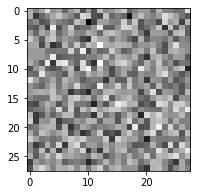

1 done 1.522537667849511 0.5786161700665365


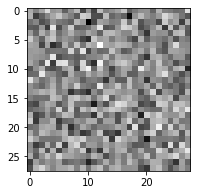

2 done 1.4238315131951107 0.6218284814446592


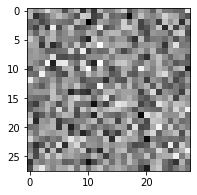

3 done 1.3974758031282892 0.6468784166678341


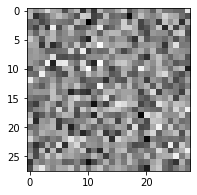

4 done 1.4521723660326915 0.606162163701114


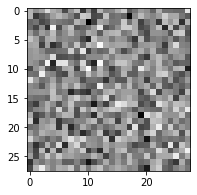

5 done 1.4967365207994479 0.6009549744162409


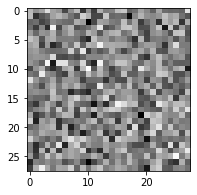

6 done 1.4975685390690492 0.6030853048652022


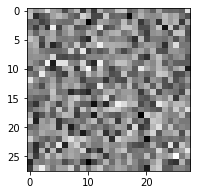

7 done 1.4379923169879165 0.6303172073895948


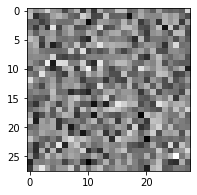

8 done 1.423880963472417 0.6427099731294351


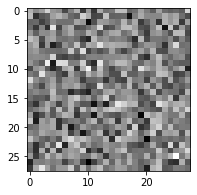

9 done 1.428319690686045 0.6384279735113731


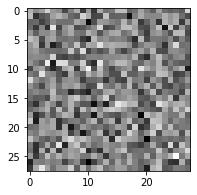

10 done 1.4203132902421596 0.6474905495147429


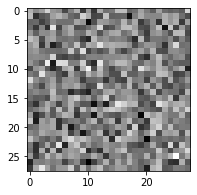

11 done 1.452256035014568 0.6281381435805916


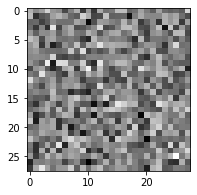

12 done 1.4503190417459675 0.6331807723732757


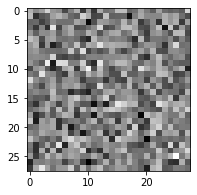

13 done 1.4300188607234998 0.6434980913038721


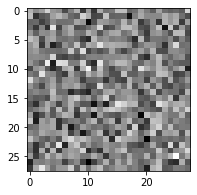

14 done 1.4047048074941642 0.6586361404416685


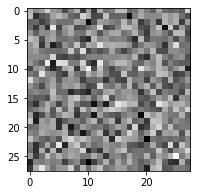

15 done 1.401954269603693 0.654495343556312


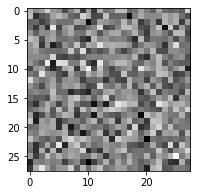

16 done 1.3958138312535324 0.6627735542969704


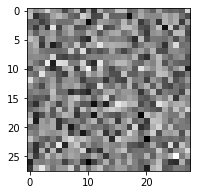

17 done 1.3974380642801179 0.659236435215946


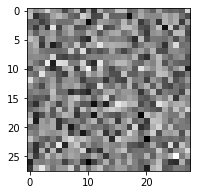

18 done 1.412481761028827 0.6466353153122661


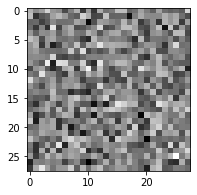

19 done 1.4099363546100432 0.6522746412797644


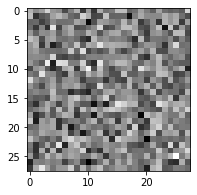

20 done 1.4010249498063758 0.6579655044771231


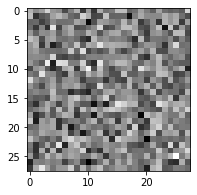

21 done 1.3846784707383353 0.6648302704735435


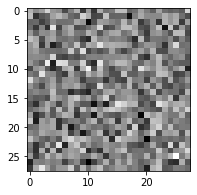

22 done 1.4041572932023885 0.6572043107507309


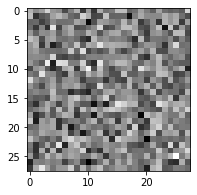

23 done 1.3948455588821356 0.6637041844667559


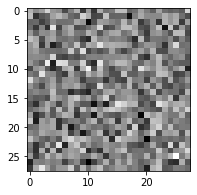

24 done 1.3958015481223496 0.6607813337957271


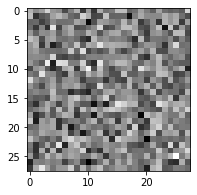

25 done 1.3840351722685407 0.6663975545937104


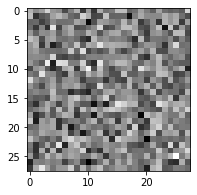

26 done 1.3861968533596032 0.6686703366437619


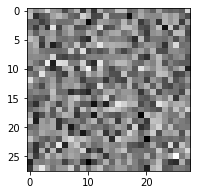

27 done 1.3834501929049574 0.6649992798330628


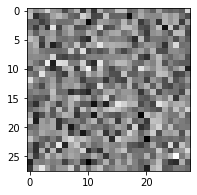

28 done 1.3875905461812432 0.6687395749831518


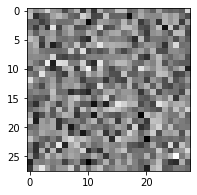

29 done 1.398157119102056 0.6593773537955029


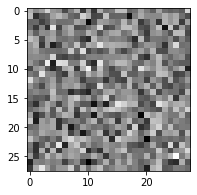

30 done 1.3939411911372976 0.6608455969539188


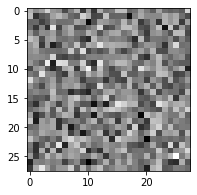

31 done 1.3900299820808748 0.669399355541898


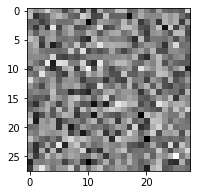

32 done 1.400449121892187 0.6588459115237245


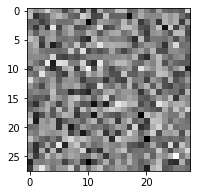

33 done 1.4084960990099435 0.6538441980601767


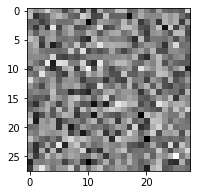

34 done 1.4044133819489746 0.6553110965205684


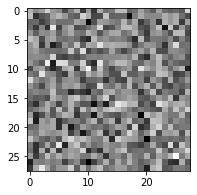

35 done 1.4128789970397826 0.6503825053701512


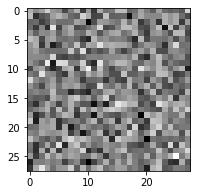

36 done 1.4012422105407565 0.6587352693158778


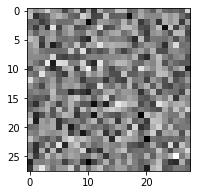

37 done 1.4036726050287045 0.6576907707304378


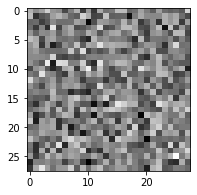

38 done 1.3984531097359538 0.6554019635810455


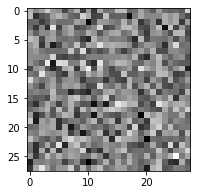

39 done 1.39540726537906 0.6610994946439741


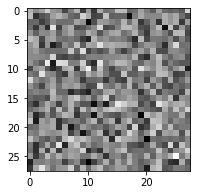

40 done 1.3920384092616958 0.6626486794340031


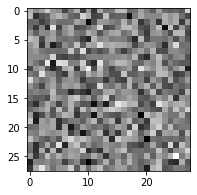

41 done 1.401916485562562 0.6584410584344762


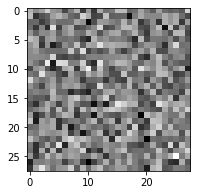

42 done 1.3969836414345183 0.6563419957563822


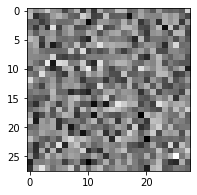

43 done 1.38031075863474 0.6717850039838105


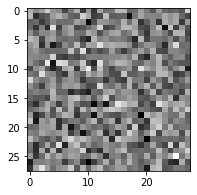

44 done 1.387561745146477 0.6626163001866981


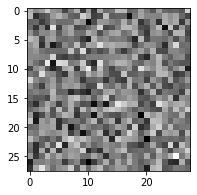

45 done 1.399602312187753 0.656811128676782


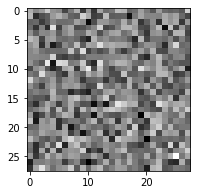

46 done 1.3843561575578671 0.6664080225589432


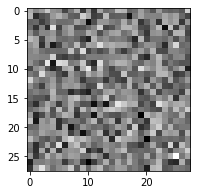

47 done 1.377215091665375 0.6710505640164613


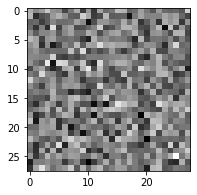

48 done 1.3860412753036984 0.6643397639861377


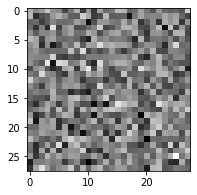

49 done 1.3896869768221527 0.6610070590354535


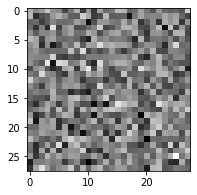

50 done 1.3828229179686349 0.6661567433750293


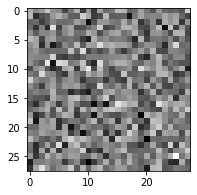

51 done 1.3694988259146073 0.6711809523555384


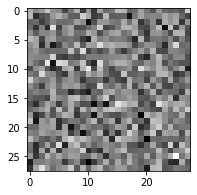

52 done 1.3796558490364934 0.6717074951342489


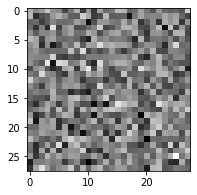

53 done 1.3897469636897783 0.6613263070328261


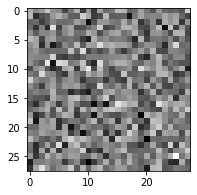

54 done 1.4051137050062616 0.6581398567868968


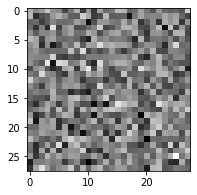

55 done 1.4072318620252644 0.6518761207038011


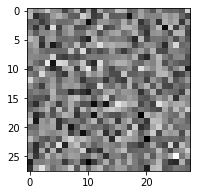

56 done 1.3926141294469694 0.6623914328498564


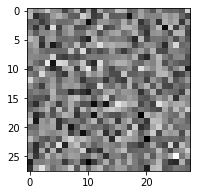

57 done 1.3892018519083784 0.6638823010308139


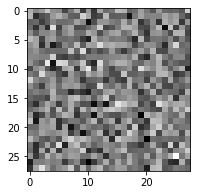

58 done 1.391553855582337 0.6651575251819515


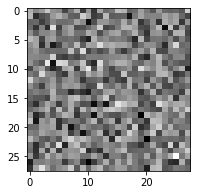

59 done 1.395859981812972 0.6596327249949617


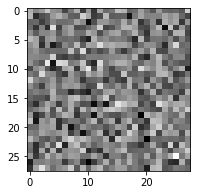

60 done 1.4090157681812858 0.6517308314789121


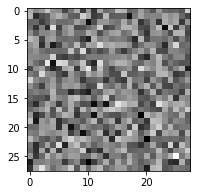

61 done 1.415215219537473 0.6480086650649044


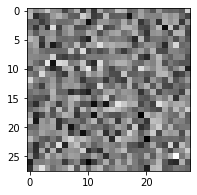

62 done 1.413126220471099 0.6524729972368766


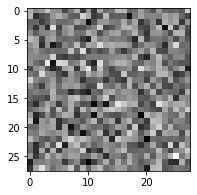

63 done 1.4087772526419797 0.6555555541661492


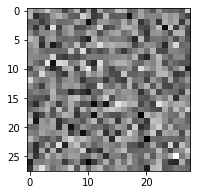

64 done 1.416629819626831 0.6480133136475454


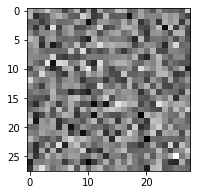

65 done 1.4175021721053873 0.6486010211909833


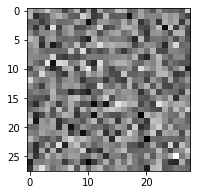

66 done 1.4082071318747427 0.6538277479564757


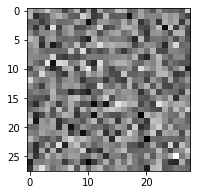

67 done 1.4060887617425797 0.6569361438950563


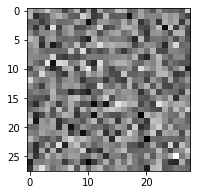

68 done 1.4003128304756551 0.6578645911106035


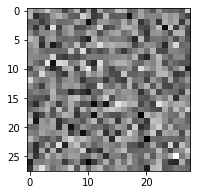

69 done 1.396014980761472 0.657616833720245


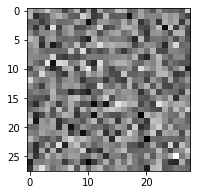

70 done 1.4085493378300498 0.6538612262480995


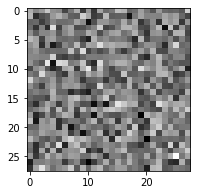

71 done 1.3963443118142747 0.6606840192894525


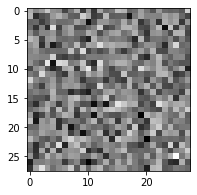

72 done 1.4037724282605355 0.6577189241173628


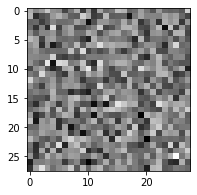

73 done 1.4010991530383003 0.6607650478208181


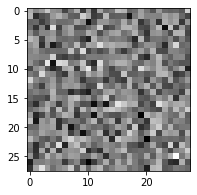

74 done 1.4063860649691358 0.6540262913136904


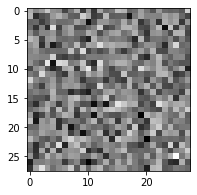

75 done 1.4078947552869936 0.6561442324772546


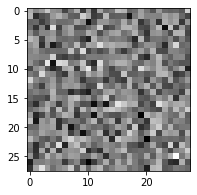

76 done 1.408816713940167 0.652564747624797


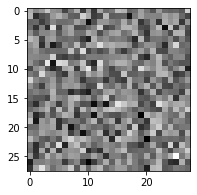

77 done 1.40368205015636 0.655061047961357


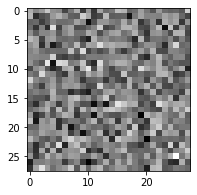

78 done 1.398288728092449 0.6598739797871067


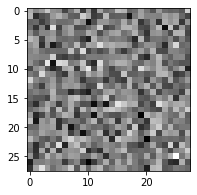

79 done 1.3991967615518621 0.6595095656273295


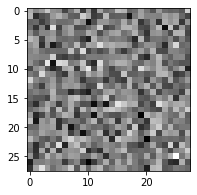

80 done 1.4003357503188445 0.6570906884402984


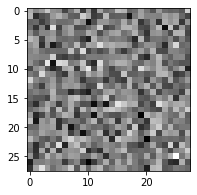

81 done 1.3991194670916909 0.6588266968328271


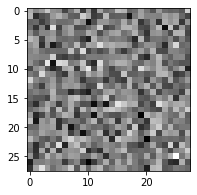

82 done 1.391233489503577 0.6659478445528901


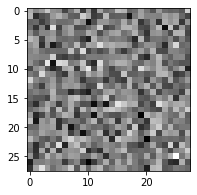

83 done 1.390470233858515 0.6639805695526694


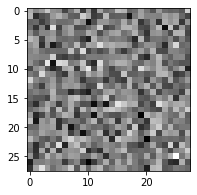

84 done 1.3775615129385088 0.6728676179849918


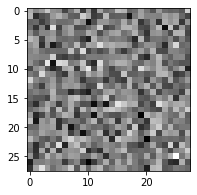

85 done 1.3863013939454123 0.6660972808245909


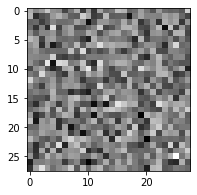

86 done 1.3820069844564677 0.6685327538100928


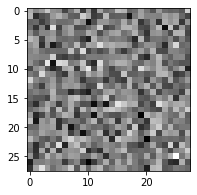

87 done 1.384563727194009 0.669278124724744


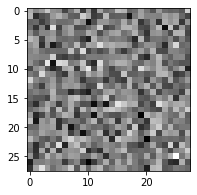

88 done 1.3814527961268275 0.6708194410056122


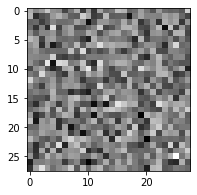

89 done 1.3762602565719542 0.6697538545465105


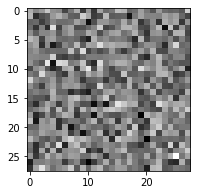

90 done 1.3808433532824798 0.667445801860173


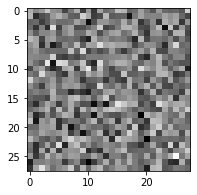

91 done 1.3803607459951797 0.6690055273780571


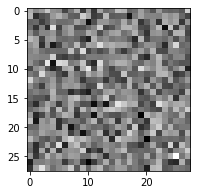

92 done 1.3766084585356584 0.6718585058952777


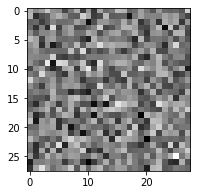

93 done 1.3687333814927052 0.6738624156965695


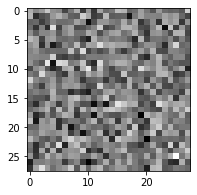

94 done 1.3680336587604143 0.6783458901711112


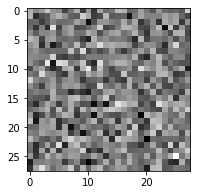

95 done 1.364035359646861 0.67958121341783


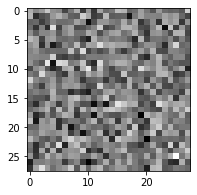

96 done 1.3639287163420033 0.6790368285539535


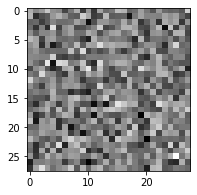

97 done 1.3676960334750163 0.6761890048049803


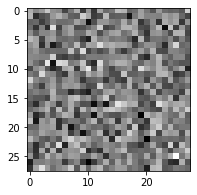

98 done 1.3709216223865217 0.6760028250745053


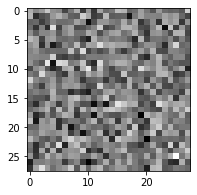

99 done 1.3713574293499915 0.6765514222877856


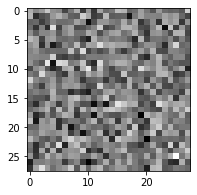

100 done 1.37325570857003 0.6741422945509715


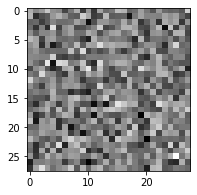

101 done 1.3806739823099532 0.668349108656919


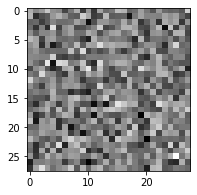

102 done 1.379884803389781 0.6606195721982455


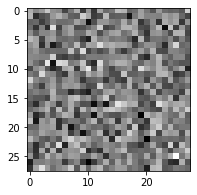

103 done 1.3721460459610024 0.6768152369485995


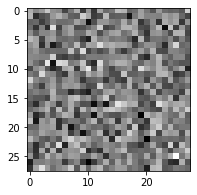

104 done 1.3862281209370217 0.6624648843907882


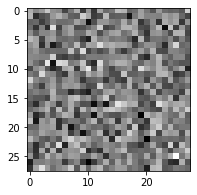

105 done 1.3777575017364119 0.6712230020849866


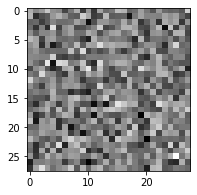

106 done 1.3789740017530152 0.6659183892167417


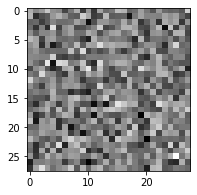

107 done 1.378789351914364 0.6711085158029926


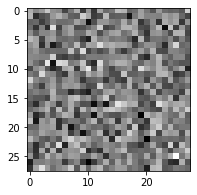

108 done 1.3823958280265538 0.6662159222070616


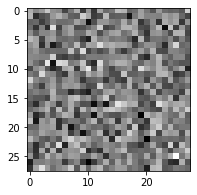

109 done 1.3757034202572105 0.6720530975355538


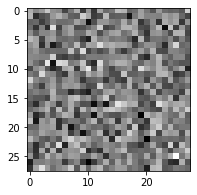

110 done 1.386373767217335 0.6632208520426823


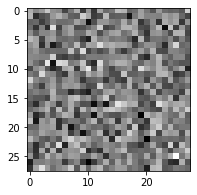

111 done 1.3802002031911487 0.670453789611031


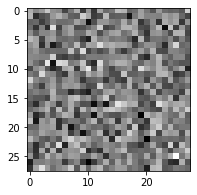

112 done 1.3817185880554905 0.668879421672155


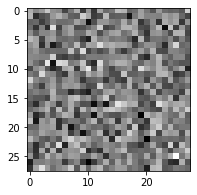

113 done 1.3829039957666989 0.6659211763886999


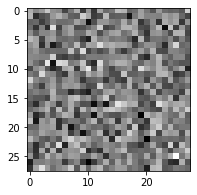

114 done 1.3867273473886135 0.662209602604003


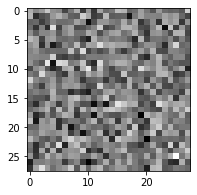

115 done 1.386742306312131 0.6640047962083525


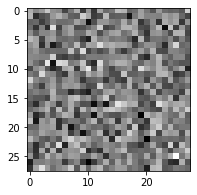

116 done 1.390425410053904 0.6617636892687959


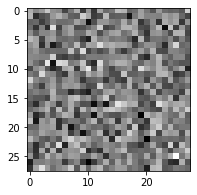

117 done 1.3773505618068143 0.6694567525815198


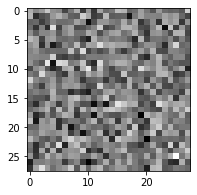

118 done 1.3872575236493225 0.6650467348816371


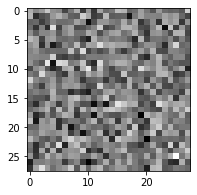

119 done 1.373422785679396 0.6730081616370619


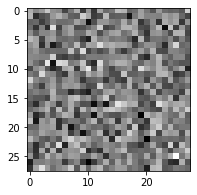

120 done 1.3734056833284067 0.6721905170085157


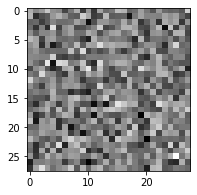

121 done 1.3850286812344375 0.6657034039540085


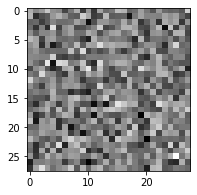

122 done 1.3793749863137994 0.6719297236342853


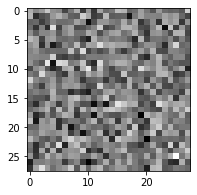

123 done 1.3843174540945933 0.6666374850950333


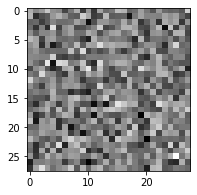

124 done 1.3823327706919273 0.6674450533896823


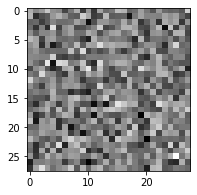

125 done 1.3782045506225444 0.6719574552769116


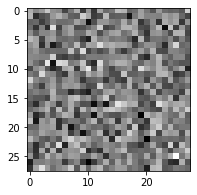

126 done 1.3764996171713315 0.670596297543585


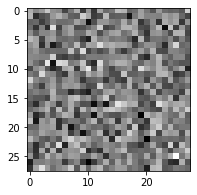

127 done 1.3842924898429012 0.6659934980351754


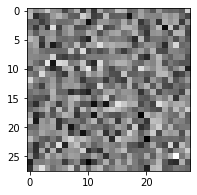

128 done 1.3807735111570196 0.668710091404198


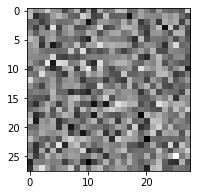

129 done 1.367138236850079 0.6761688046655108


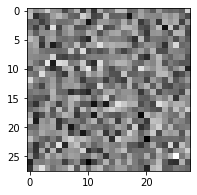

130 done 1.3742016985065217 0.6689338122190034


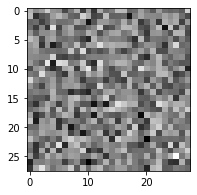

131 done 1.3692601415038272 0.6762973428530891


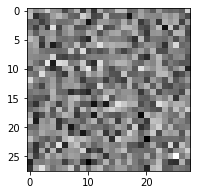

132 done 1.3728728358100128 0.6717326324032644


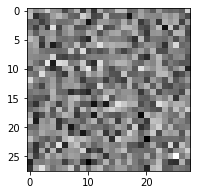

133 done 1.368755300072658 0.6759106249034417


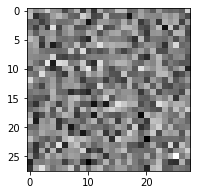

134 done 1.35967961430094 0.6837166578314012


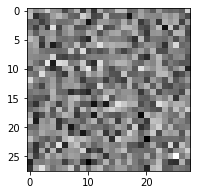

135 done 1.3779610214953955 0.6688165879339558


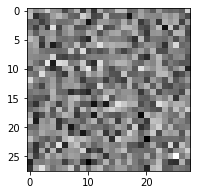

136 done 1.3684756156262388 0.6758166105221336


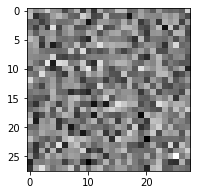

137 done 1.3697197320404135 0.6733429834494988


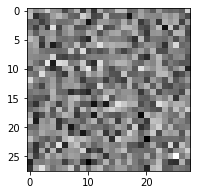

138 done 1.3683399819608135 0.676142614875754


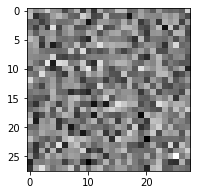

139 done 1.366562808561533 0.6745172660557466


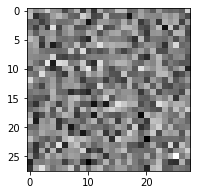

140 done 1.3613701583363755 0.6805587383186846


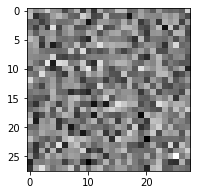

141 done 1.3711162175454559 0.6737256533344183


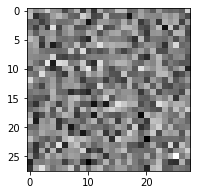

142 done 1.3678391906105827 0.6738593242827703


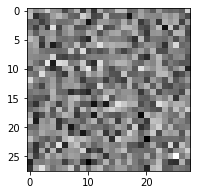

143 done 1.3581212077926255 0.6841974386435055


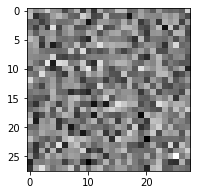

144 done 1.367637762893283 0.6771041412163019


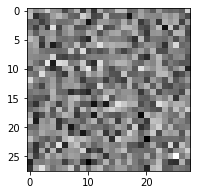

145 done 1.3733928187399682 0.6689273116642802


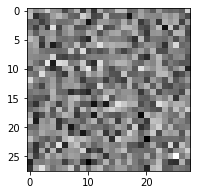

146 done 1.3675826589481688 0.6736754780682064


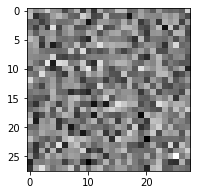

147 done 1.3644671772277317 0.6785103364282515


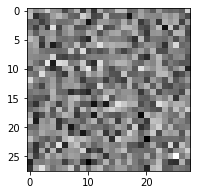

148 done 1.3640193014845396 0.6758740943184616


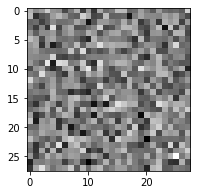

149 done 1.3717766308213242 0.6679899334361064


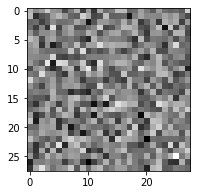

150 done 1.371822041730089 0.6736369542657471


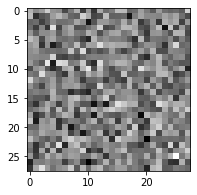

151 done 1.3663149046937908 0.680792578615295


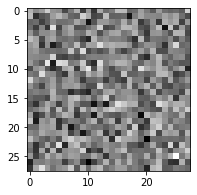

152 done 1.3699030106393202 0.6702295925721311


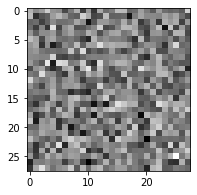

153 done 1.363276832452901 0.6775700665585782


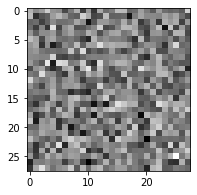

154 done 1.3700550034311667 0.6749654193434775


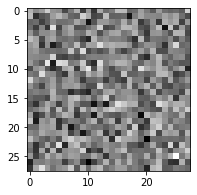

155 done 1.3696714413580455 0.6750616650302543


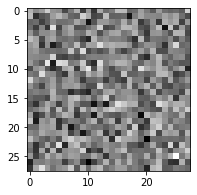

156 done 1.3724060445931945 0.6677650003891259


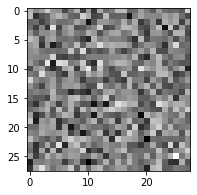

157 done 1.3677433348672636 0.675139641187891


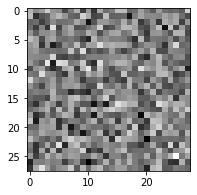

158 done 1.3680738759268973 0.6754016208042959


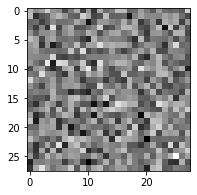

159 done 1.367068585573247 0.6729927264380492


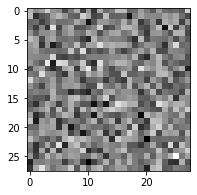

160 done 1.3672666620933993 0.6774863225496668


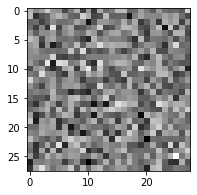

161 done 1.3683613394504546 0.6730277870333187


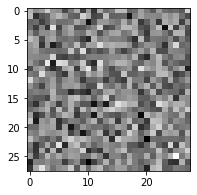

162 done 1.3600610582750485 0.681252354660121


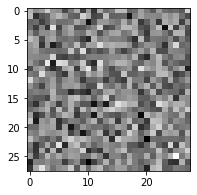

163 done 1.3695042250724123 0.6734778805171892


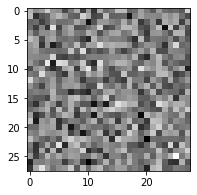

164 done 1.3702866209616138 0.6742295829509848


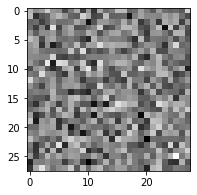

165 done 1.3682794698531782 0.6713954178687365


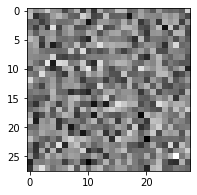

166 done 1.3660574559859509 0.6779024399113412


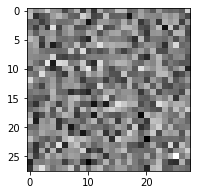

167 done 1.3714241702539036 0.6715656846163292


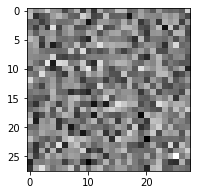

168 done 1.3689274420542477 0.675466147074795


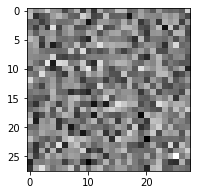

169 done 1.3601724614834767 0.6794880001020519


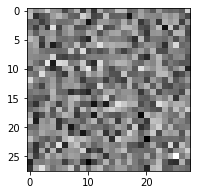

170 done 1.3578034601109659 0.6840650973043612


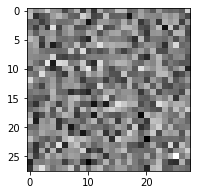

171 done 1.3712225367044748 0.6699955670027583


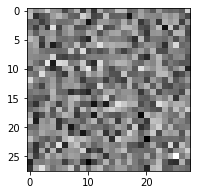

172 done 1.3670154429329078 0.6746607892633592


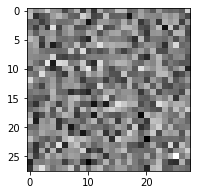

173 done 1.358081284160643 0.6789452824845376


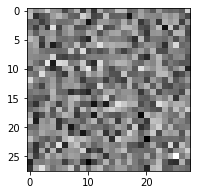

174 done 1.3665368987664681 0.67745175650619


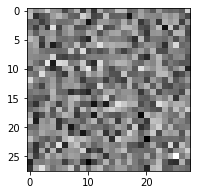

175 done 1.3678969477133816 0.6733403524318412


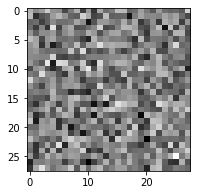

176 done 1.3591370494095234 0.6817493771173074


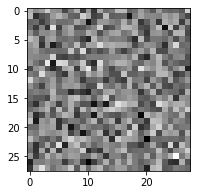

177 done 1.363365553162158 0.6771419917134596


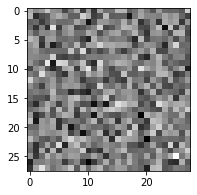

178 done 1.3746488644408508 0.6677833861535373


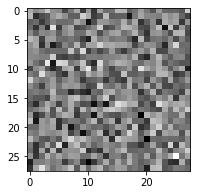

179 done 1.3704783728522287 0.6750197884215295


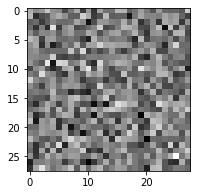

180 done 1.3725540746213423 0.6703788395400023


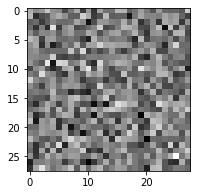

181 done 1.3651474756200057 0.6754816825950006


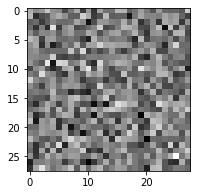

182 done 1.362332868879544 0.6769115681233748


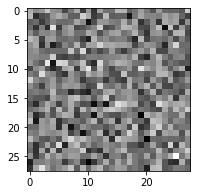

183 done 1.3678141500941097 0.6772661624274889


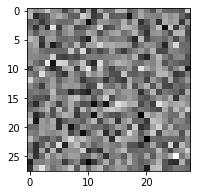

184 done 1.3652395158419006 0.6761155201020104


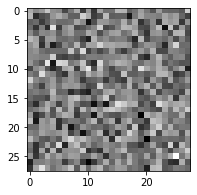

185 done 1.3732987045285974 0.6708206933218173


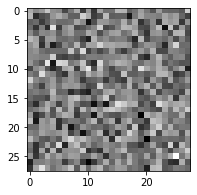

186 done 1.3662664577042396 0.6752410156949775


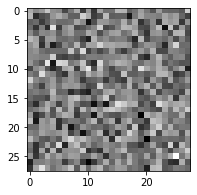

187 done 1.3662265699982454 0.6772593150925171


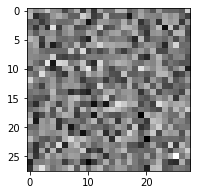

188 done 1.3664978367547134 0.6733454018910208


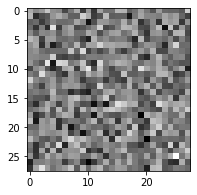

189 done 1.370022487618496 0.6726125365730015


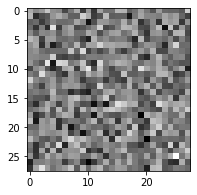

190 done 1.3622170461712606 0.6762665840491116


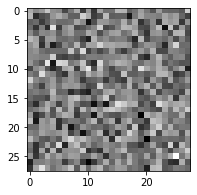

191 done 1.3674822289305348 0.6766461731548312


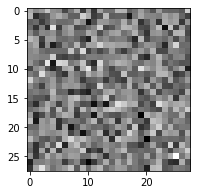

192 done 1.3737784799944694 0.66835734896918


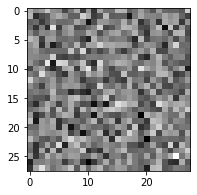

193 done 1.3705803731964887 0.6726972391661223


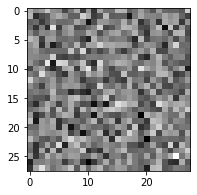

194 done 1.3715303016433213 0.6726575292016047


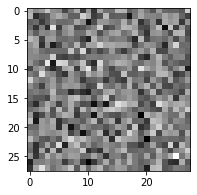

195 done 1.3755223067836204 0.6678652949493641


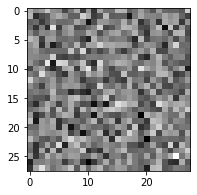

196 done 1.360208053869206 0.680439847215863


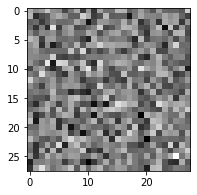

197 done 1.3724917857757553 0.6752769150088088


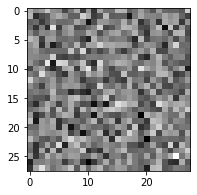

198 done 1.3678730372773453 0.6755647039326254


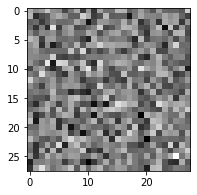

199 done 1.3644104045275236 0.6787110319346952


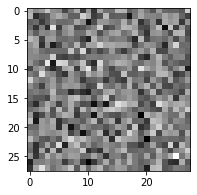

200 done 1.3569494098098915 0.6865589032271131


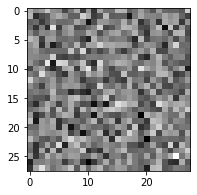

201 done 1.368771902299531 0.6741024747539577


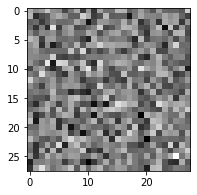

202 done 1.3676883902749897 0.6750499020075424


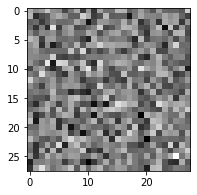

203 done 1.362826729149468 0.679017292270936


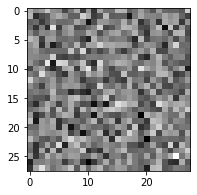

204 done 1.355527057590375 0.6832932062947441


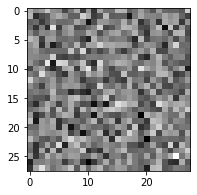

205 done 1.3640468638119723 0.6767770510111139


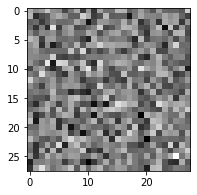

206 done 1.3647626325948388 0.6754843619288826


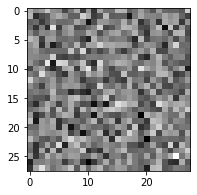

207 done 1.3689008759055437 0.6733693875430687


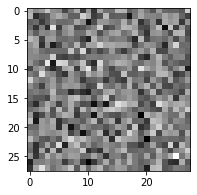

208 done 1.3578750969667752 0.681831250564773


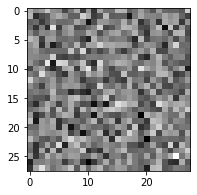

209 done 1.3605897618671237 0.6794475667249762


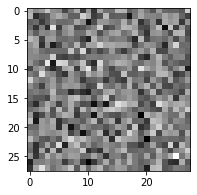

210 done 1.361180985487385 0.6781855137382358


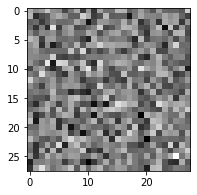

211 done 1.3584476502991256 0.6816313347285057


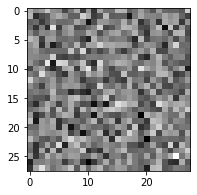

212 done 1.359253488430391 0.6792543306063425


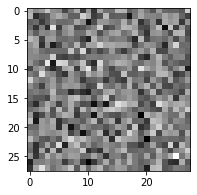

213 done 1.3683507061287439 0.6763092959905689


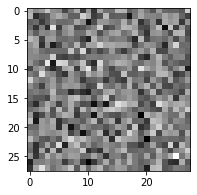

214 done 1.3691933158892655 0.6744515005280823


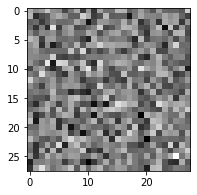

215 done 1.3616416819230353 0.6809442582726418


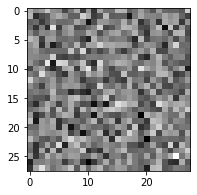

216 done 1.367083567612418 0.6767819764533737


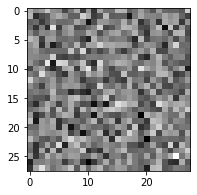

217 done 1.3631809936902461 0.6756422910745302


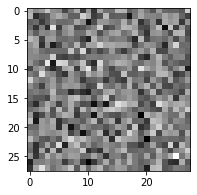

218 done 1.3653908962575303 0.6771373633913212


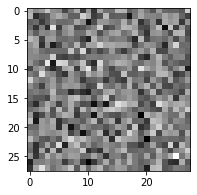

219 done 1.3600495967424882 0.6820871744212872


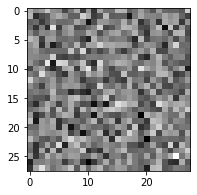

220 done 1.3579844635406288 0.682559345035479


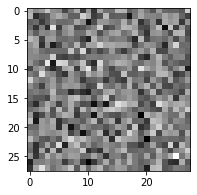

221 done 1.3608985013721957 0.6811262224640109


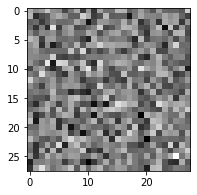

222 done 1.3563304843186852 0.6816620663988375


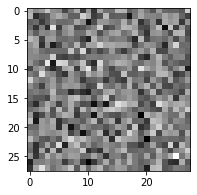

223 done 1.3660502547130418 0.6794384887154146


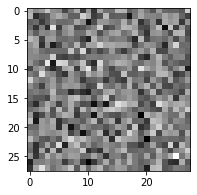

224 done 1.3579017955567123 0.681607052940026


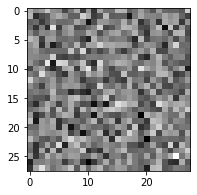

225 done 1.35877974331362 0.6817544167764684


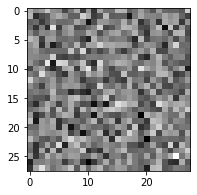

226 done 1.3664015639928326 0.6785118255197101


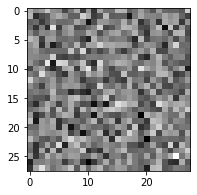

227 done 1.3628073645538112 0.676753295338482


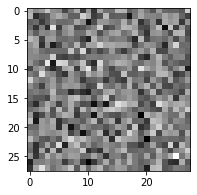

228 done 1.362660900269151 0.6803898803166692


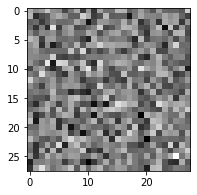

229 done 1.362409832466379 0.6803720717258743


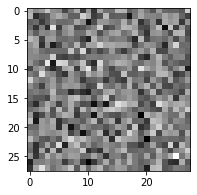

230 done 1.3722358938280943 0.6714151869633398


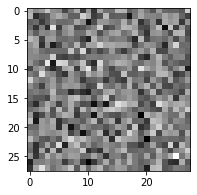

231 done 1.3600221939874837 0.6778132310022652


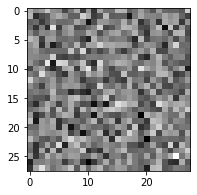

232 done 1.3691275061036912 0.6759217689366048


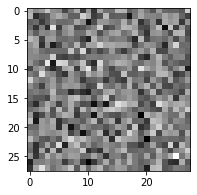

233 done 1.36398956051944 0.6779618423800438


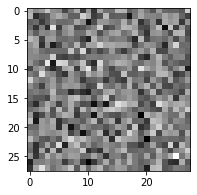

234 done 1.362448961382207 0.6801602377768556


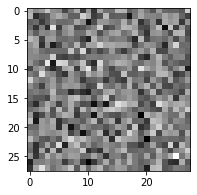

235 done 1.360853736600075 0.6782998696793068


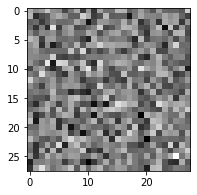

236 done 1.370041365057527 0.6699967341972124


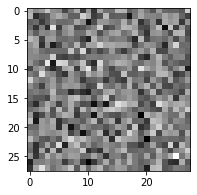

237 done 1.3677727112700402 0.6752646029805378


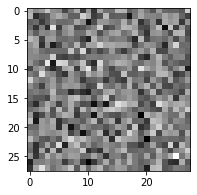

238 done 1.356906014844538 0.681532095222184


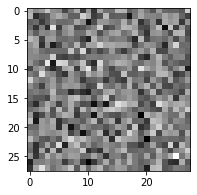

239 done 1.362096749360033 0.6804236044921863


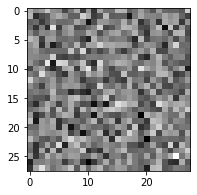

240 done 1.3710688532483735 0.6735250905559889


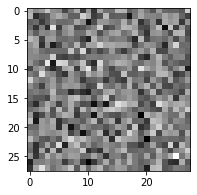

241 done 1.3688207011224713 0.6743815973135687


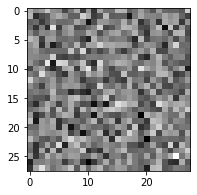

242 done 1.373833360960523 0.6721090497528751


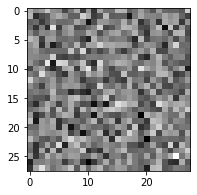

243 done 1.3659806767552003 0.6781178050582944


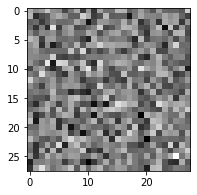

244 done 1.3669715224168009 0.6743625270930865


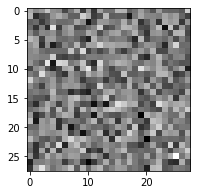

245 done 1.3672627799631283 0.6730540817258206


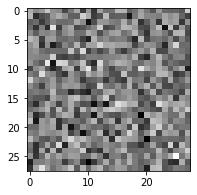

246 done 1.3739605305447 0.6678357058776394


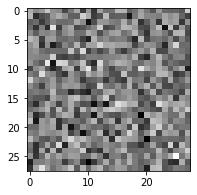

247 done 1.3652826607553405 0.6793669318878975


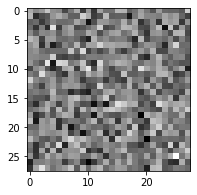

248 done 1.370096553419978 0.6747278970183985


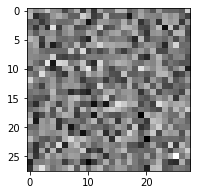

249 done 1.3728133140300034 0.6732993040117351


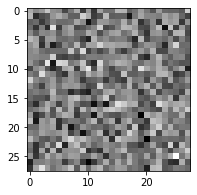

250 done 1.3700171235159118 0.6741548102754534


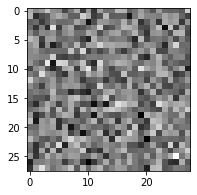

251 done 1.3670669868452525 0.6762986200148509


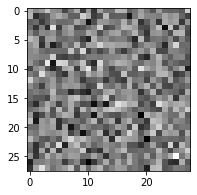

252 done 1.3625992088264527 0.6774408442509946


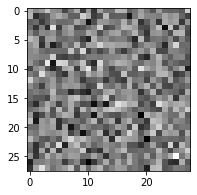

253 done 1.360609786886568 0.6814720590190915


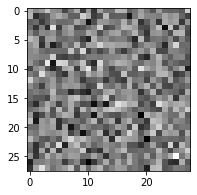

254 done 1.371925782096054 0.6696115737866125


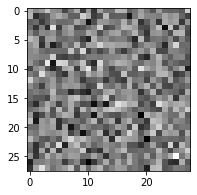

255 done 1.3702874549917223 0.6723007796337277


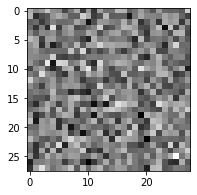

256 done 1.3654019245444329 0.6746857432366647


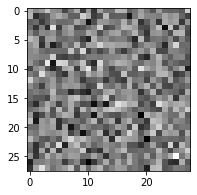

257 done 1.369618152281409 0.6740129022787981


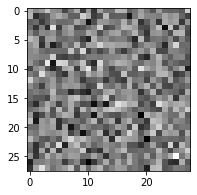

258 done 1.3631003987541013 0.680890381764345


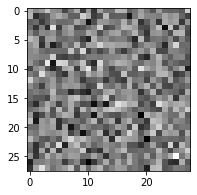

259 done 1.364702069170807 0.6756156355257589


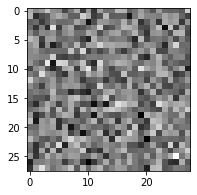

260 done 1.368044087146057 0.6755756217830248


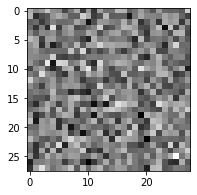

261 done 1.364688163391004 0.6777752129295642


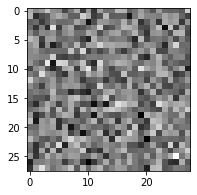

262 done 1.366459531315582 0.6780356797694862


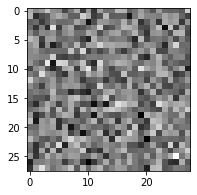

263 done 1.365938952566778 0.6774790660330847


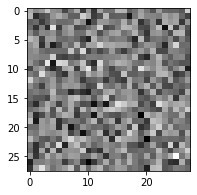

264 done 1.367384651399332 0.6738497594523881


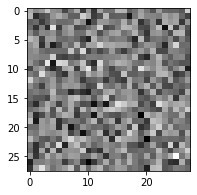

265 done 1.3679244250413607 0.6758865117982213


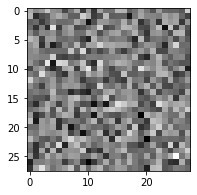

266 done 1.3670001065739015 0.6731431377121655


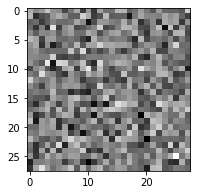

267 done 1.3670285768983756 0.676035176132971


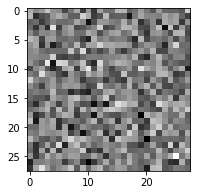

268 done 1.368147189173265 0.6749372497588286


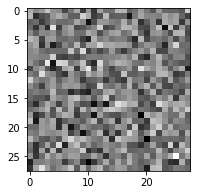

269 done 1.3630502596894563 0.6783349843961196


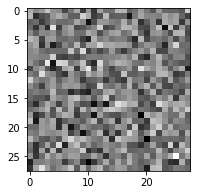

270 done 1.3732804905624842 0.6748943177981157


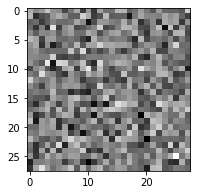

271 done 1.3726292974087548 0.6721794195956519


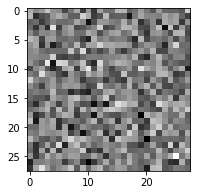

272 done 1.3652766030279941 0.6786428448349653


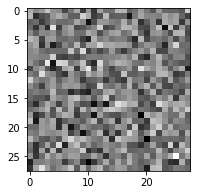

273 done 1.3597059513427718 0.6813909373509349


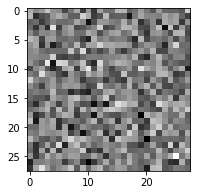

274 done 1.3735365928698828 0.6713233836972108


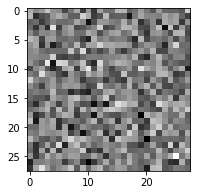

275 done 1.3699717039983108 0.6741260745526697


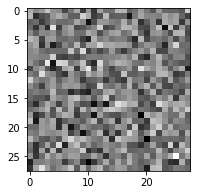

276 done 1.3742587063005158 0.6710541105869912


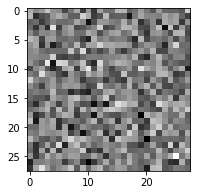

277 done 1.3714137330883593 0.6707287128748995


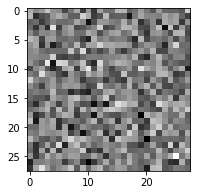

278 done 1.3670698371275896 0.6743896067844676


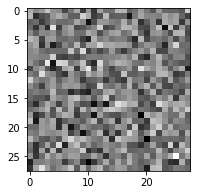

279 done 1.3719378631819228 0.6726094579728604


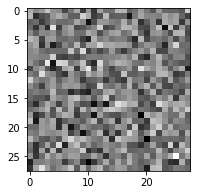

280 done 1.380678224260935 0.6639854276520305


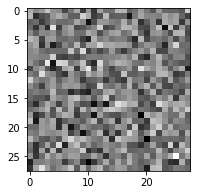

281 done 1.3670141110578204 0.6754697013193591


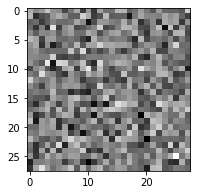

282 done 1.3786443714409107 0.6692561712255449


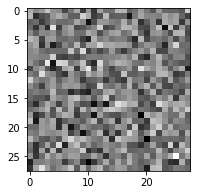

283 done 1.371506409421937 0.6756757141077567


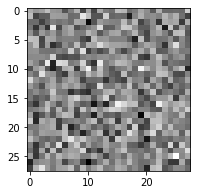

284 done 1.3827755826482426 0.6710068131017694


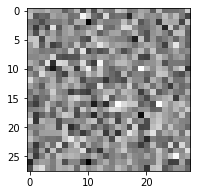

285 done 1.3908335869375228 0.6581746376839975


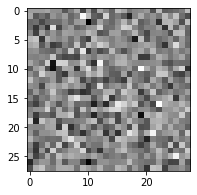

286 done 1.4060954084350255 0.6563465790313183


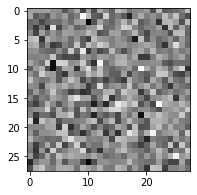

287 done 1.3939307751796546 0.6647775959973301


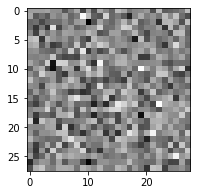

288 done 1.4006963187340018 0.6588836578347815


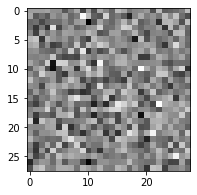

289 done 1.394751616446594 0.66332716834178


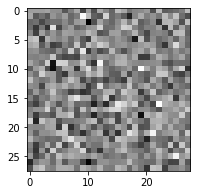

290 done 1.3909726885477485 0.6660220752184951


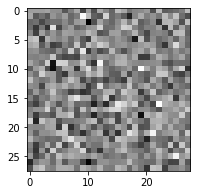

291 done 1.3749064628986536 0.6759445406743623


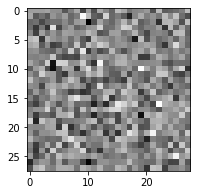

292 done 1.3793591071247366 0.6746297396577651


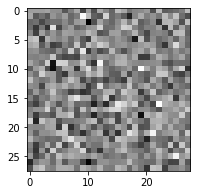

293 done 1.3750705665755902 0.6749122741687992


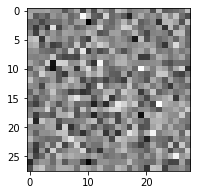

294 done 1.3860747438669307 0.6709118854884405


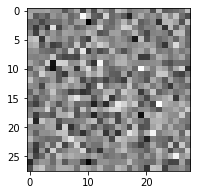

295 done 1.384575470836109 0.6679546270460804


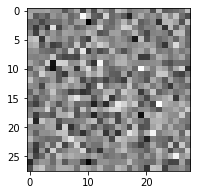

296 done 1.3928090533899327 0.6668476012461801


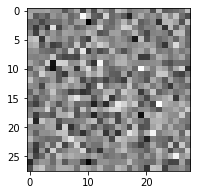

297 done 1.3906270925029176 0.6664040531041422


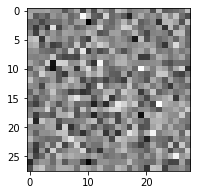

298 done 1.3920354036648366 0.6657638718548432


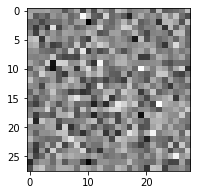

299 done 1.394865057331308 0.6673560892254946


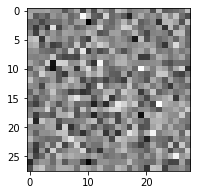

300 done 1.386620401334445 0.6680163925415405


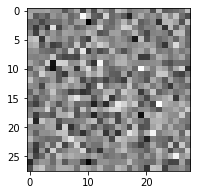

301 done 1.3933373426379703 0.6662266034879555


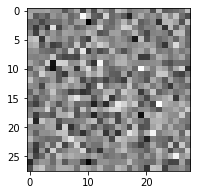

302 done 1.3916909385599465 0.6660654141888449


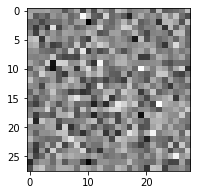

303 done 1.3907983086862885 0.667736944749995


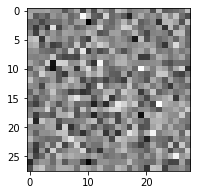

304 done 1.3939451592804881 0.6646885800752548


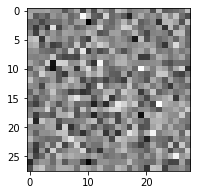

305 done 1.3965886465535067 0.665789583517686


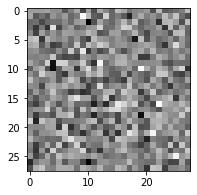

306 done 1.3970204891518436 0.6640446187490657


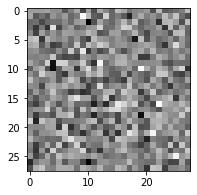

307 done 1.3954004472256014 0.6637965830214055


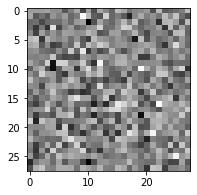

308 done 1.3913483689544601 0.6653808257597869


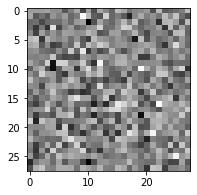

309 done 1.3870788255596127 0.6678856579652835


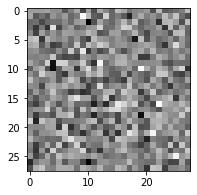

310 done 1.390411048637176 0.6678276875974285


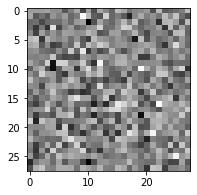

311 done 1.382942917049156 0.6714013818707247


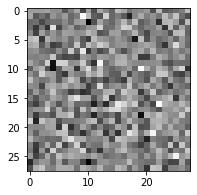

312 done 1.392038351173952 0.6674113352795191


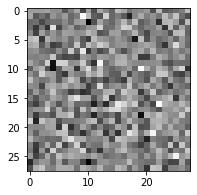

313 done 1.391472000477558 0.6640872369260338


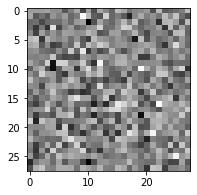

314 done 1.38649730008787 0.6693530100200032


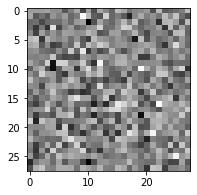

315 done 1.3852717548180746 0.6705659781301995


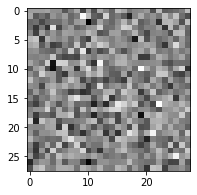

316 done 1.3827329034795688 0.6736160348444551


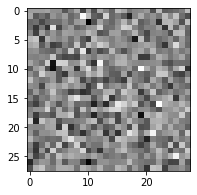

317 done 1.3960659078493824 0.6622904478708946


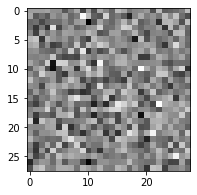

318 done 1.3896481009754102 0.6661232775875471


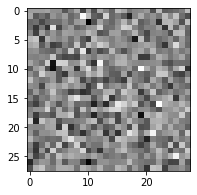

319 done 1.3893336352376842 0.6668741015342572


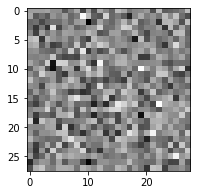

320 done 1.384509210058634 0.6713907137124056


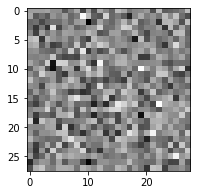

321 done 1.388324140177074 0.6675996530239622


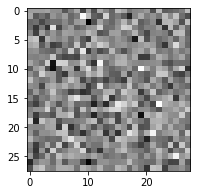

322 done 1.3922057549208227 0.666158018386322


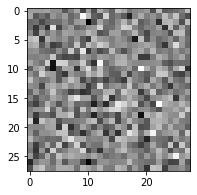

323 done 1.3921502971019881 0.6657806729919764


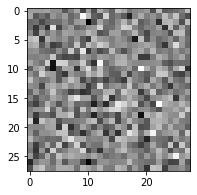

324 done 1.3904231628996662 0.6668791681533677


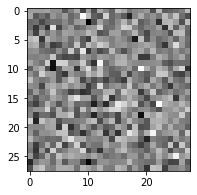

325 done 1.3997235588599353 0.6588503756942472


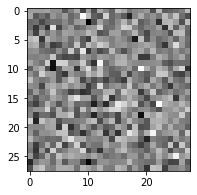

326 done 1.392731418955735 0.6621590343368873


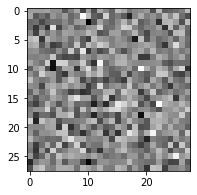

327 done 1.3803054101033192 0.6738107234511072


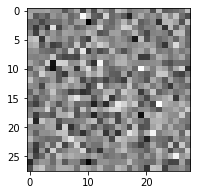

328 done 1.3871422339999786 0.6700583385494142


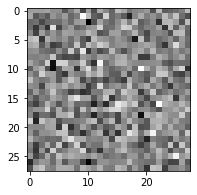

329 done 1.3822705563159288 0.674560025059436


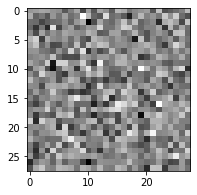

330 done 1.3910529028106602 0.6664444244195629


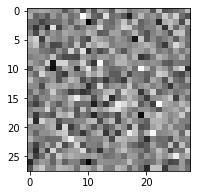

331 done 1.3886086932496298 0.6675445997833324


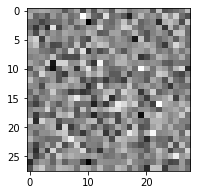

332 done 1.384343777157675 0.6712338736407473


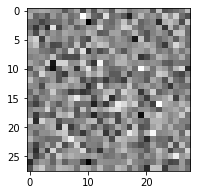

333 done 1.3818737070880651 0.671499368636384


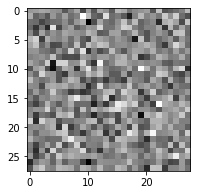

334 done 1.3729438509296024 0.6788539834245491


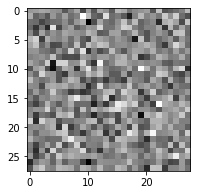

335 done 1.3829758999556039 0.6709404351661573


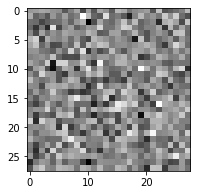

336 done 1.3812117827238939 0.6689091572958134


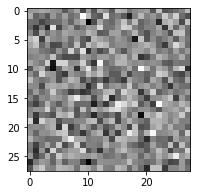

337 done 1.3778655604154486 0.6731472700218399


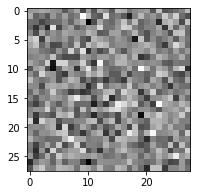

338 done 1.3799800408867633 0.6714720884022922


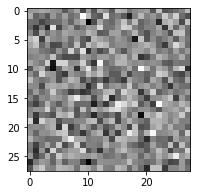

339 done 1.3741104607177375 0.6763524002094605


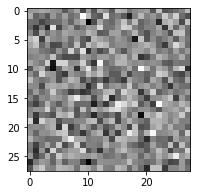

340 done 1.3818744975756143 0.6744333847385567


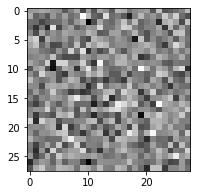

341 done 1.3754856105836029 0.6739927053575945


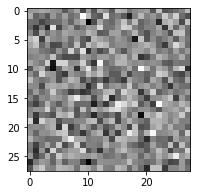

342 done 1.3778838423920778 0.6741832843101384


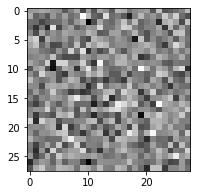

343 done 1.3796626776300736 0.6721649705770956


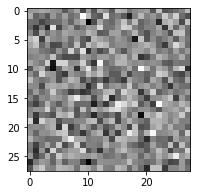

344 done 1.3849712515843724 0.6711645461928042


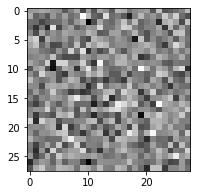

345 done 1.3810598354146288 0.6720502041467089


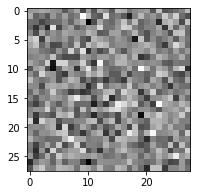

346 done 1.3902576029254243 0.6665815046656332


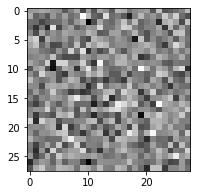

347 done 1.3840533922147569 0.6703470291405269


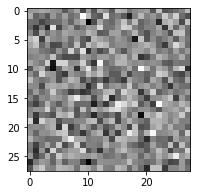

348 done 1.3789474229556151 0.6736035209794158


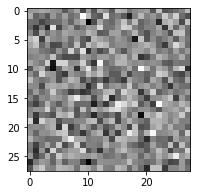

349 done 1.3764178639118982 0.6727593708621713


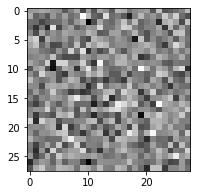

350 done 1.386987918960444 0.6694334470747505


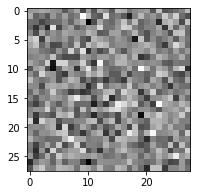

351 done 1.3821230252335475 0.6709066272685716


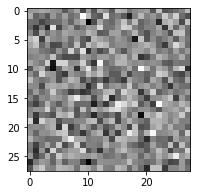

352 done 1.3847724181230368 0.6683110262012322


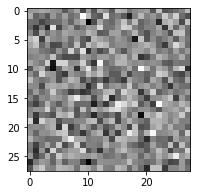

353 done 1.3869982262022067 0.6668044626601529


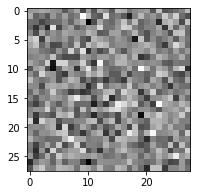

354 done 1.37913877313871 0.6722737670448365


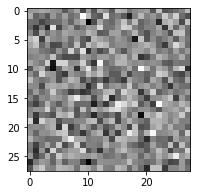

355 done 1.3732801276043203 0.678189584728372


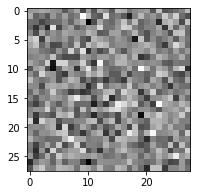

356 done 1.3785748873714307 0.6735698302603672


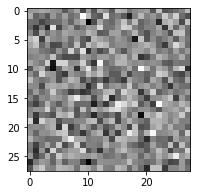

357 done 1.3717226409147207 0.6774725074409078


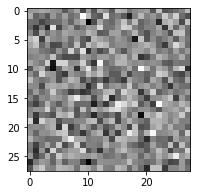

358 done 1.3743844595866976 0.676252183350184


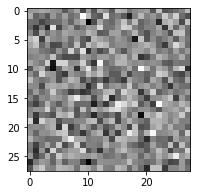

359 done 1.373003348479568 0.6751157079504585


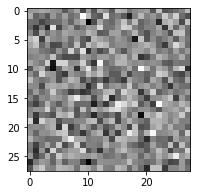

360 done 1.3764926328601965 0.6760687523548282


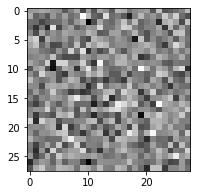

361 done 1.3791430159055718 0.6749697136802916


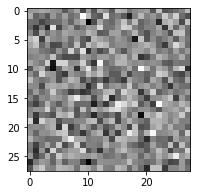

362 done 1.3807631205023734 0.6696875932832624


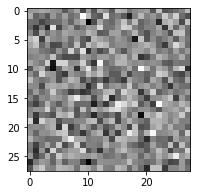

363 done 1.3792143498048686 0.6750686241493997


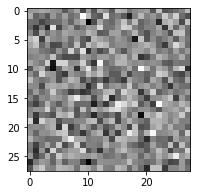

364 done 1.3791523885288093 0.6697084891718302


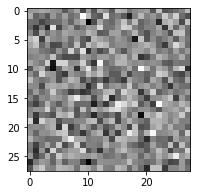

365 done 1.3754813451625254 0.6751656509781043


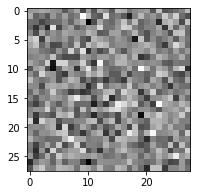

366 done 1.367002847052238 0.6806816257537327


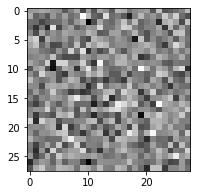

367 done 1.380737339685786 0.6714281987399395


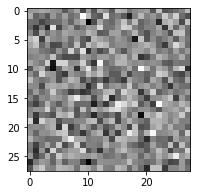

368 done 1.3754605755401004 0.673083809949068


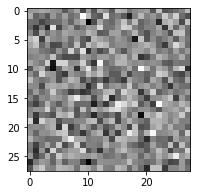

369 done 1.372814531217438 0.6771082896084747


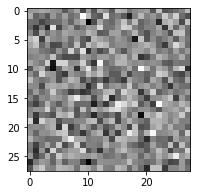

370 done 1.3647205678896075 0.6804509132965768


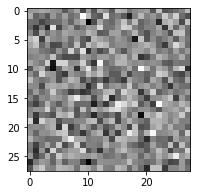

371 done 1.3702516655458539 0.6792116441810393


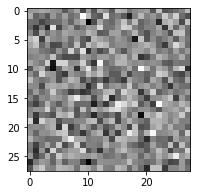

372 done 1.3729572474408474 0.6742625121567098


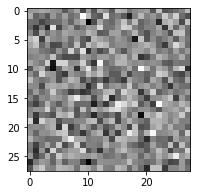

373 done 1.3742848349496468 0.6771238367867323


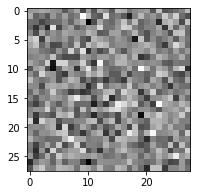

374 done 1.376206971888728 0.6731047646622879


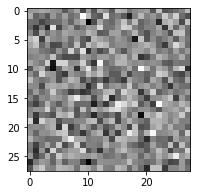

375 done 1.3741968740076642 0.6764362886766824


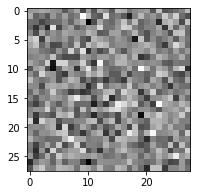

376 done 1.3806072751838865 0.6713371162568356


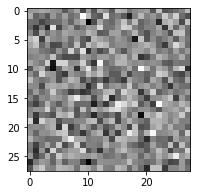

377 done 1.3658211525054127 0.6799907903353398


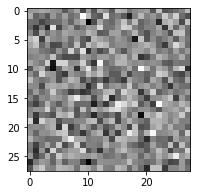

378 done 1.377744943242871 0.6750041963172925


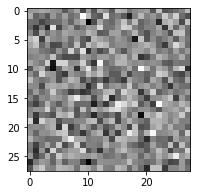

379 done 1.3795338230841256 0.6743293417308536


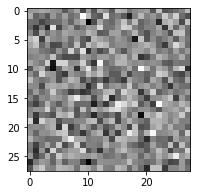

380 done 1.3789821651557328 0.674249939652321


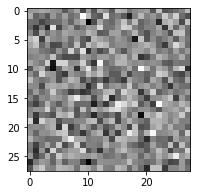

381 done 1.3809039219382417 0.6717536782938482


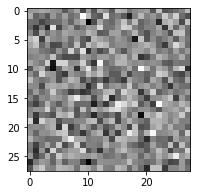

382 done 1.37754835716115 0.6750947888306479


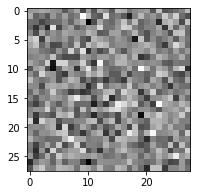

383 done 1.3797855847011695 0.6677063434142456


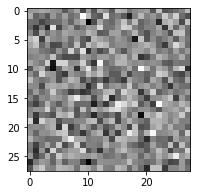

384 done 1.3809874627341063 0.6746513118860988


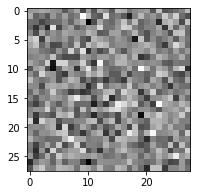

385 done 1.380667108587364 0.6722088956401225


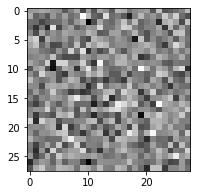

386 done 1.374563930740649 0.6762365877345025


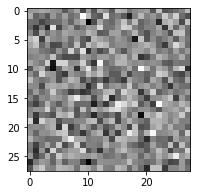

387 done 1.3700247719028282 0.6789979279168684


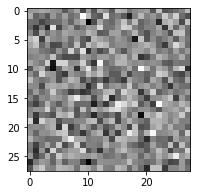

388 done 1.377455186553571 0.6748197666875961


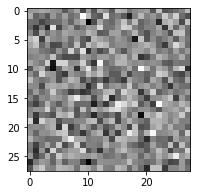

389 done 1.3871474928505116 0.6671700340796661


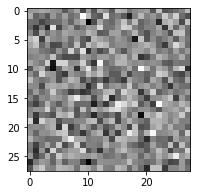

390 done 1.3764688490168704 0.6715725082114133


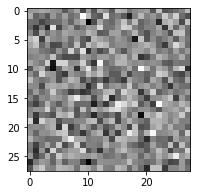

391 done 1.378777411187058 0.6732884311059271


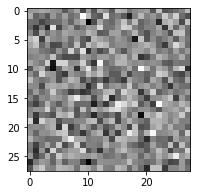

392 done 1.3724599015778542 0.6789794688979949


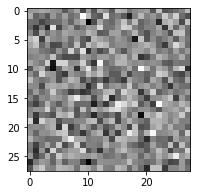

393 done 1.3796389919013734 0.6724839516645703


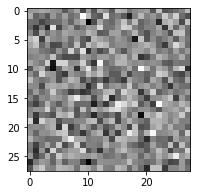

394 done 1.375537630345684 0.6763697406852656


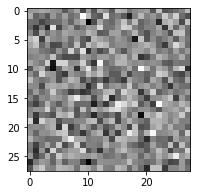

395 done 1.3725509108133696 0.6771593977034996


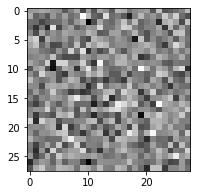

396 done 1.378342753562717 0.6735362360183502


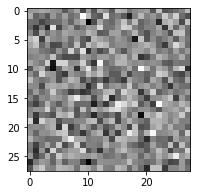

397 done 1.3821858030488563 0.6693798451671655


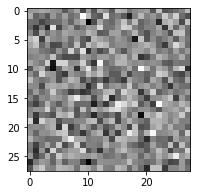

398 done 1.3787249467702796 0.6725927246992783


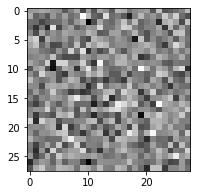

399 done 1.3776732235505966 0.6751760317154302


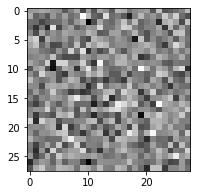

400 done 1.3810553909880843 0.6726698292480133


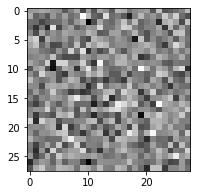

401 done 1.3763455479875661 0.6743688560309585


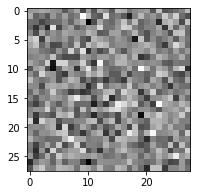

402 done 1.37424936206507 0.6754725472707949


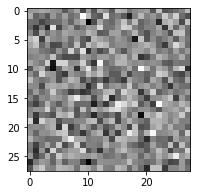

403 done 1.3765824441000476 0.6768272650949254


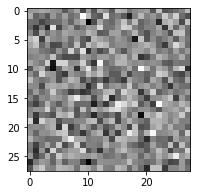

404 done 1.3787138884773344 0.6730294800819703


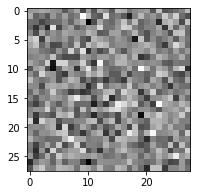

405 done 1.381342377050144 0.6719192914261447


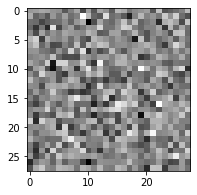

406 done 1.370888747633768 0.679134062102956


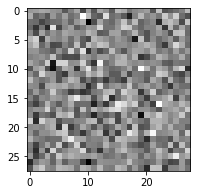

407 done 1.3773564268456824 0.6742199394995596


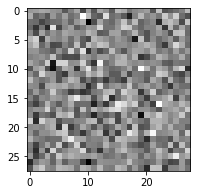

408 done 1.3745247961376021 0.6761984908856107


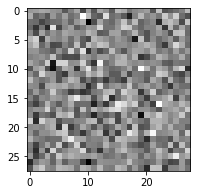

409 done 1.376539117431454 0.67541429047456


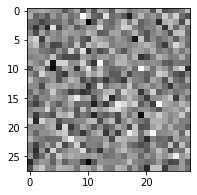

410 done 1.3820094184557556 0.6705113066879526


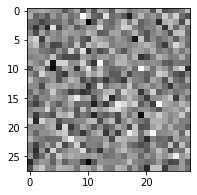

411 done 1.3839988152549494 0.6688534018846519


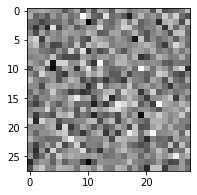

412 done 1.3753365758643785 0.6752579380460872


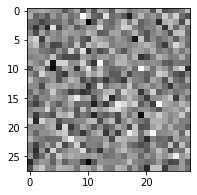

413 done 1.3770430744816666 0.6746457761703303


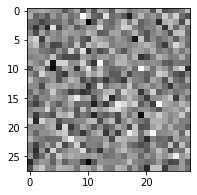

414 done 1.3719192752811693 0.6779398657810273


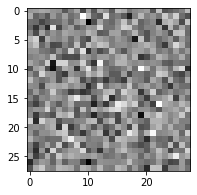

415 done 1.376379504831697 0.6748860483067737


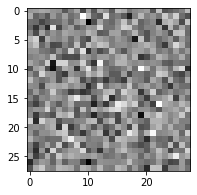

416 done 1.3723596466818102 0.6758524483566171


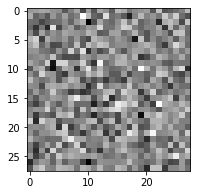

417 done 1.3747852355719143 0.6755777188009207


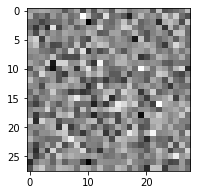

418 done 1.3756478810780688 0.6762244660356362


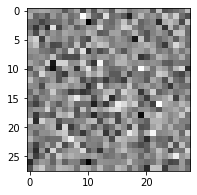

419 done 1.3722367916345526 0.6767578040604709


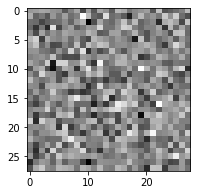

420 done 1.377464658764981 0.673591420311358


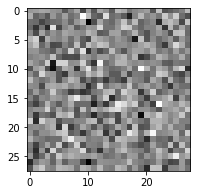

421 done 1.3786620923197108 0.672611084132245


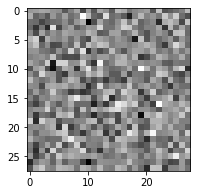

422 done 1.379700449952854 0.673359102972375


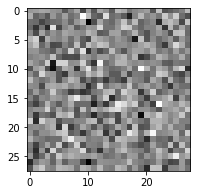

423 done 1.3778564739626245 0.6742709753521307


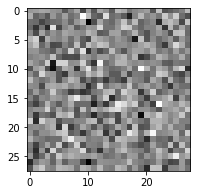

424 done 1.380481627107622 0.6691977807941566


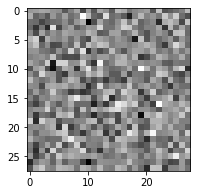

425 done 1.3716583472740353 0.6790409521143271


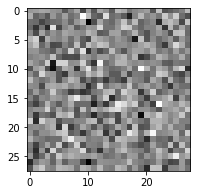

426 done 1.3792372609000105 0.6713004862115775


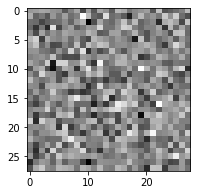

427 done 1.3752699793892382 0.6747560876488716


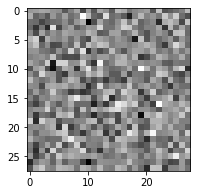

428 done 1.3789184530451621 0.6730373397459011


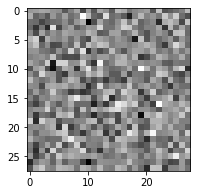

429 done 1.371504789302914 0.6798953529398677


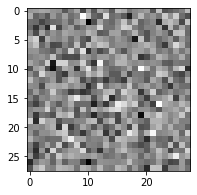

430 done 1.3762451649068537 0.6736012030780962


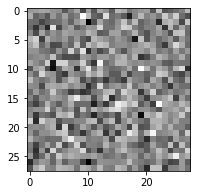

431 done 1.3691245692362493 0.6798651239172534


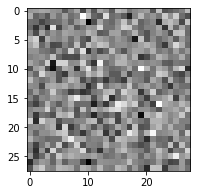

432 done 1.3886075006207923 0.6702833414182


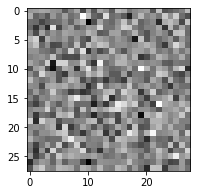

433 done 1.3757020724229188 0.6742605428920263


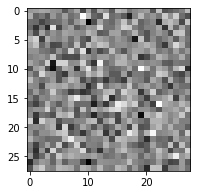

434 done 1.3698170861759769 0.6763679483711925


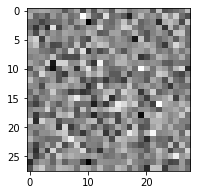

435 done 1.383976446989018 0.6730195474458356


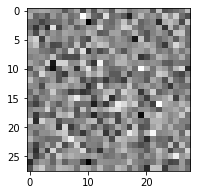

436 done 1.3831905020135706 0.6690143197653379


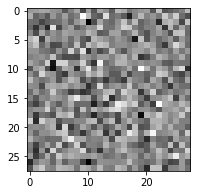

437 done 1.3816153901507138 0.6712708095100336


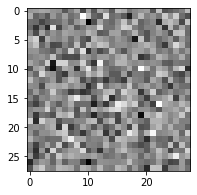

438 done 1.388198041861327 0.6641482111106458


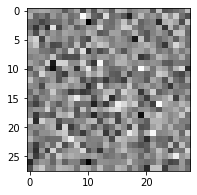

439 done 1.388237966824637 0.6703123288112725


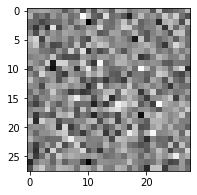

440 done 1.393026864658473 0.6659130223033797


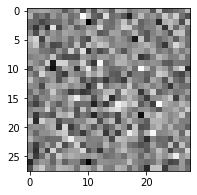

441 done 1.3879174617974304 0.6689301259658386


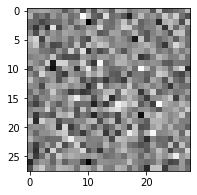

442 done 1.392335596360435 0.6667948044838642


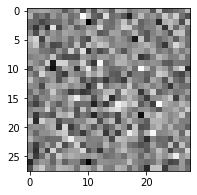

443 done 1.3949629462000326 0.6662797676477642


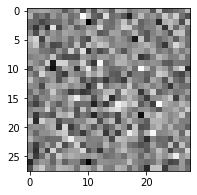

444 done 1.3976196188675323 0.663349179896087


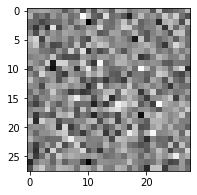

445 done 1.3984474643647353 0.6635414364157883


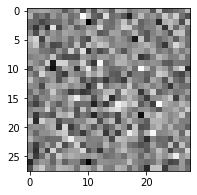

446 done 1.3979078387875248 0.6633958610798769


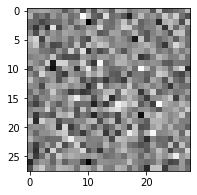

447 done 1.395325899524124 0.665041267602062


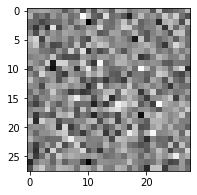

448 done 1.403495526754961 0.6608381144820348


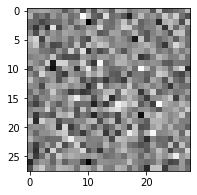

449 done 1.3909016427532244 0.6680579425079685


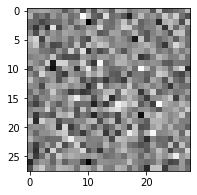

450 done 1.3910578083162193 0.6698263873387212


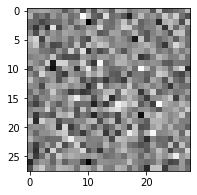

451 done 1.398731817809896 0.6634785250490565


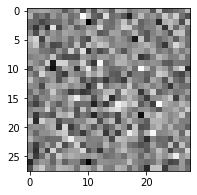

452 done 1.3920717357063301 0.6680708276104159


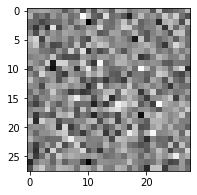

453 done 1.3918381454707158 0.6664890509627399


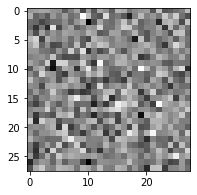

454 done 1.3888693495827311 0.6693561440372383


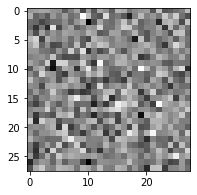

455 done 1.389165902101491 0.6692377726434886


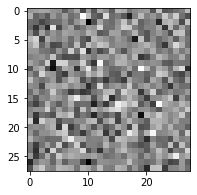

456 done 1.389872706985977 0.6653598539136346


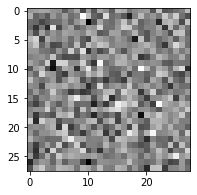

457 done 1.3969337890190534 0.6658464903362228


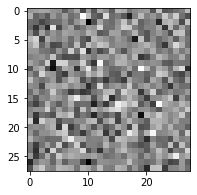

458 done 1.3885128539165634 0.6707274149959886


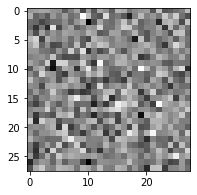

459 done 1.3900152668710848 0.668175103627998


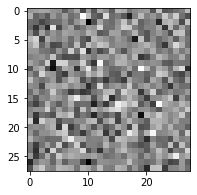

460 done 1.3948886602966022 0.6606430619604748


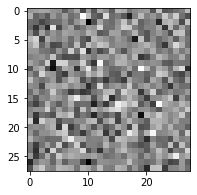

461 done 1.3868711756984737 0.6688041304250961


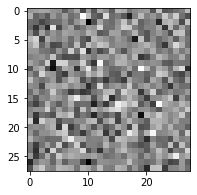

462 done 1.3882107876891343 0.6677316266530902


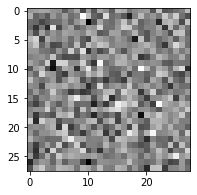

463 done 1.396741048347885 0.6626245488219601


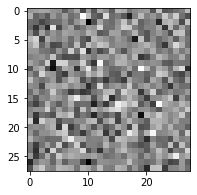

464 done 1.3907857319799204 0.6645495406841923


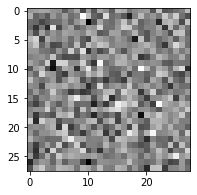

465 done 1.38759496106436 0.6699764164717572


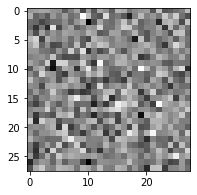

466 done 1.388548937352961 0.6648185242872365


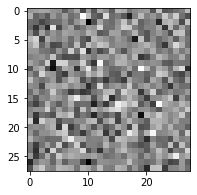

467 done 1.3940748490515138 0.6655522179405502


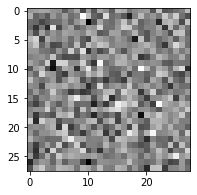

468 done 1.3983510243628865 0.6632686711152368


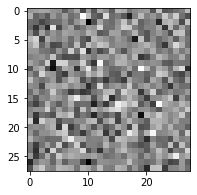

469 done 1.395489614092806 0.6635492857865064


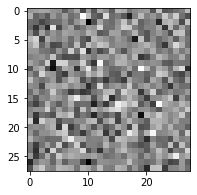

470 done 1.3962753691452776 0.6633962357088109


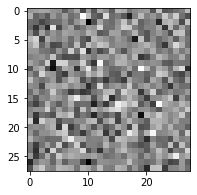

471 done 1.3937893633570178 0.6642804222323238


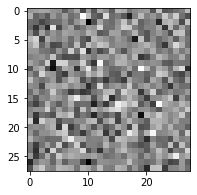

472 done 1.4039379673880596 0.6601271415338646


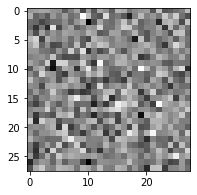

473 done 1.3922183130883434 0.6649527011429548


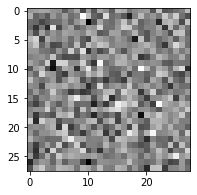

474 done 1.3870910538610073 0.6694446303675827


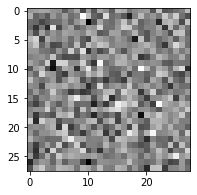

475 done 1.3847685767713014 0.6708727594118171


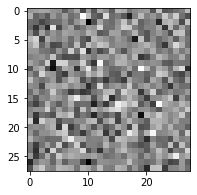

476 done 1.3940443335987454 0.6623891410176396


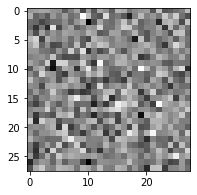

477 done 1.3962088124223926 0.6601678758928659


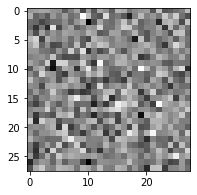

478 done 1.37833711404407 0.6772364221098384


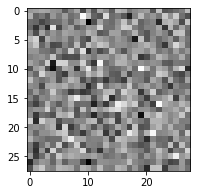

479 done 1.3859582149315062 0.669593766789555


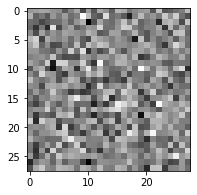

480 done 1.3865289575375415 0.6721731008083994


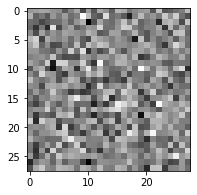

481 done 1.38914562993608 0.6699991336237368


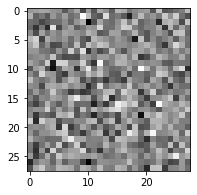

482 done 1.391303639530973 0.6657091763072762


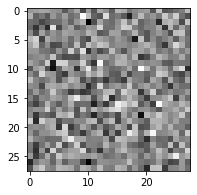

483 done 1.3953939086541112 0.6651778940078238


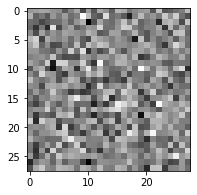

484 done 1.395560122335936 0.6656169179359196


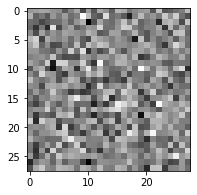

485 done 1.3935259863710496 0.6671471721964546


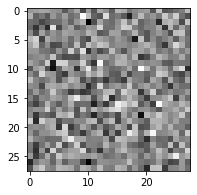

486 done 1.3968825834076979 0.6618251010018775


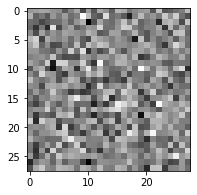

487 done 1.394135593284815 0.6665149424432173


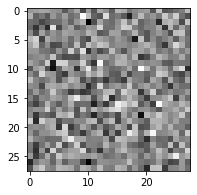

488 done 1.3954566500156036 0.6648753617951855


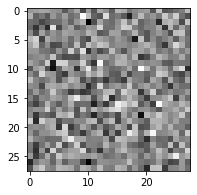

489 done 1.3975413132875825 0.662346565885545


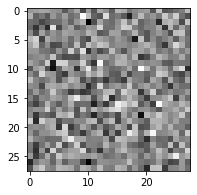

490 done 1.400147387522711 0.6576960675364176


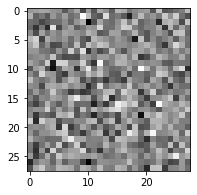

491 done 1.3932860394357318 0.6632918450454063


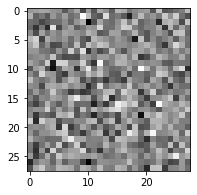

492 done 1.3861727799095995 0.6696773082888074


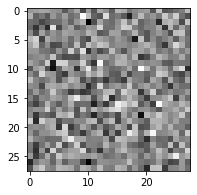

493 done 1.39355137846181 0.6650590922165242


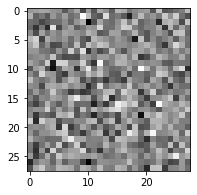

494 done 1.3949461959713971 0.6657281931236958


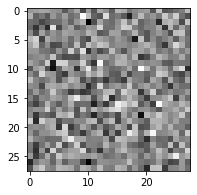

495 done 1.3942518646896878 0.6653197118835704


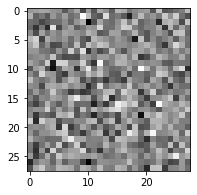

496 done 1.3887576701380693 0.666484056274058


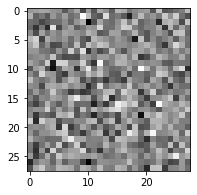

497 done 1.3919140692994794 0.6688924046469016


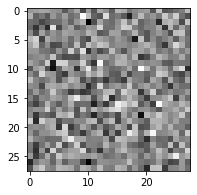

498 done 1.3924113796790591 0.66582167797516


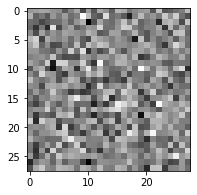

499 done 1.3900004830896433 0.668447541195093


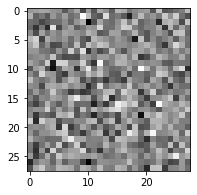

In [15]:
BATCH_SIZE = 64
NOISE_DIM = 100
IMG_SIZE = 28*28
EPOCHS = 500

G = Generator(noise_size = NOISE_DIM, output_size = IMG_SIZE)
D = Discriminator(x_size = IMG_SIZE)

# 
batch_iters=train_images.shape[0]//BATCH_SIZE

# visualizing noise
np.random.seed(7777)
testing_noise = create_noise(1,100)

D_loss_history=[]
G_loss_history=[]
for epoch in range(EPOCHS):
    g_losses = 0
    d_losses = 0
    for batch_iter in range(batch_iters):        
        ## D train
        # generate fake image
        noises = create_noise(BATCH_SIZE,NOISE_DIM)
        fake_img = G.forward(noises)

        # prepare real image
        real_img = train_images[batch_iter*BATCH_SIZE:(batch_iter+1)*BATCH_SIZE]

        #forward
        real_output = D.forward(real_img)
        fake_output = D.forward(fake_img)

        # loss, gradient
        d_loss, d_grad = D_loss(real_output, fake_output)
        
        # train
        D.backward(d_grad,train=True)
        

        ## G train
        noises = create_noise(BATCH_SIZE,NOISE_DIM)
        fake_img = G.forward(noises)
        fake_output = D.forward(fake_img,train=False)
        
        g_loss, g_grad = G_loss(fake_output)
        
        dout = D.backward(g_grad, train=False)
        G.backward(dout,train=True)
        
        g_losses += g_loss
        d_losses += d_loss
        
    # loss history
    D_loss_history.append(d_losses/batch_iters)
    G_loss_history.append(g_losses/batch_iters)
    
    
    print(epoch,'done',D_loss_history[-1], G_loss_history[-1])
    
    # 
    t_img = G.forward(testing_noise).reshape(28,28)
    plt.figure(figsize=(3,3))
    plt.imshow(t_img, cmap='gray')
    plt.show()

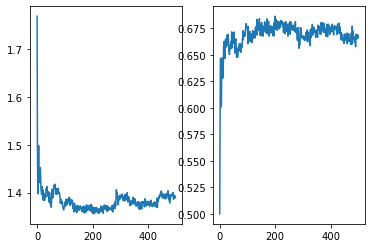

In [16]:
plt.subplot(1,2,1)
plt.plot(D_loss_history)

plt.subplot(1,2,2)
plt.plot(G_loss_history)

plt.show()

# Ref


https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence

https://ko.wikipedia.org/wiki/%EC%BF%A8%EB%B0%B1-%EB%9D%BC%EC%9D%B4%EB%B8%94%EB%9F%AC_%EB%B0%9C%EC%82%B0

https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence

https://hyeongminlee.github.io/post/prob002_kld_jsd/